### Problem Statement
**Building an Enhanced Product Recommendation System for Ebuss: Leveraging Sentiment Analysis and Collaborative Filtering**

**Introduction: Enhancing User Experience through Personalized Recommendations**

In the dynamic realm of e-commerce, 'Ebuss' seeks to establish a strong foothold by revolutionizing its product recommendation system. The goal is to provide users with a seamless and personalized shopping experience, achieved through the amalgamation of sentiment analysis and collaborative filtering techniques.

**Unveiling Insights: Data Analysis and Preprocessing**

To initiate the project, a meticulous exploration of an expansive dataset comprising over 30,000 user reviews across diverse products is undertaken. The dataset's cleanliness and coherence are ensured by strategically addressing missing values and refining textual data. The transformation of textual input into a numerical format amenable to machine learning involves employing techniques like TF-IDF, word embeddings, or deep learning methodologies.

**Decoding Opinions: Sentiment Analysis Model Selection**

Multiple machine learning models, including Logistic Regression, Random Forest, XGBoost, and Naive Bayes, are harnessed to discern the sentiment conveyed within the reviews. Rigorous evaluation of these models aids in the identification of the most adept sentiment analysis model. Once selected, this model becomes an integral part of the project's framework.

**Pathways to Recommendation: Developing Robust Recommendation Systems**

Two distinct recommendation systems—user-based and item-based—are meticulously evaluated. By harnessing the power of collaborative filtering techniques such as matrix factorization and nearest neighbor approaches, the project crafts a recommendation system that aligns with Ebuss's goal of providing tailored suggestions to users.

**Where Sentiment Meets Suggestions: Infusing Sentiment Analysis into Recommendations**

Distinguishing itself from conventional recommendation systems, this project amalgamates sentiment analysis with the recommendation framework. The sentiment scores derived from user reviews wield influence over the ranking of recommended products. This stratagem ensures that products with glowing reviews occupy a prominent position in the recommendations.

**From Concept to Interface: User-Centric Deployment and Accessibility**

With the sentiment analysis and recommendation system primed, the project transitions into the deployment phase. Leveraging the Flask framework, a user interface is crafted. Users input their usernames, triggering a sequence where their reviews are scrutinized for sentiment analysis. The culmination of this process culminates in the presentation of five product recommendations tailored to individual preferences.

**Pioneering Innovation: Elevating Ebuss's Market Standing**

Ultimately, the project aspires to elevate Ebuss's standing in the competitive e-commerce arena. By pioneering a comprehensive solution that marries sentiment analysis and collaborative filtering, the project aims to reshape user interactions, offering finely tuned product recommendations. Continuous refinement mechanisms ensure that the system remains attuned to evolving user preferences, thus fortifying Ebuss's position in the ever-evolving e-commerce landscape.





In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import statements
# Disable all warnings
import warnings
warnings.filterwarnings("ignore")
!pip install pandas_profiling
!pip install swifter
import pandas as pd
from pandas_profiling import ProfileReport
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import string
import swifter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=b900ecc1449e803f61f9b611257926c924750973354e187bb4fcd5d61164f576
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.1.1
    Uninstalling pydantic-2.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## Import datasets

In [3]:
# Load the dataset
data_path = '/content/drive/MyDrive/sample30.csv'
df = pd.read_csv(data_path)
df.head()

id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...   

                         manufacturer  \
0  Universal Music Group / Cash Money   
1                            Lundberg   
2                            Lundberg   
3                                 K-Y   
4                                 K-Y   

                                         name              reviews_date  \
0   Pink Friday: Roman Reloaded Re-Up (w/dvd)  2012-11-30T06:21:45.000Z   
1  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
2  Lundberg Organic Cinnamon Toast Rice Cakes  2017-07-09T00:00:00.000Z   
3            K-Y Love Sensuality Pleasure Gel  2016-01-06T00:00:00.000Z   
4            K-Y Love Sensuality Pleasure Gel  2016-12-21T00:00:00.000Z   

  reviews_didPurchase reviews_doRecommend  reviews_rating  \
0                 NaN                 NaN               5   
1                True                 NaN               5   
2                True                 NaN               5   
3               False               False               1   
4               False               False               1   

                                        reviews_text reviews_title  \
0  i love this album. it's very good. more to the...  Just Awesome   
1  Good flavor. This review was collected as part...          Good   
2                                       Good flavor.          Good   
3  I read through the reviews on here before look...  Disappointed   
4  My husband bought this gel for us. The gel cau...    Irritation   

  reviews_userCity reviews_userProvince reviews_username user_sentiment  
0      Los Angeles                  NaN           joshua       Positive  
1              NaN                  NaN        dorothy w       Positive  
2              NaN                  NaN        dorothy w       Positive  
3              NaN                  NaN          rebecca       Negative  
4              NaN                  NaN        walker557       Negative

## Exploratory analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

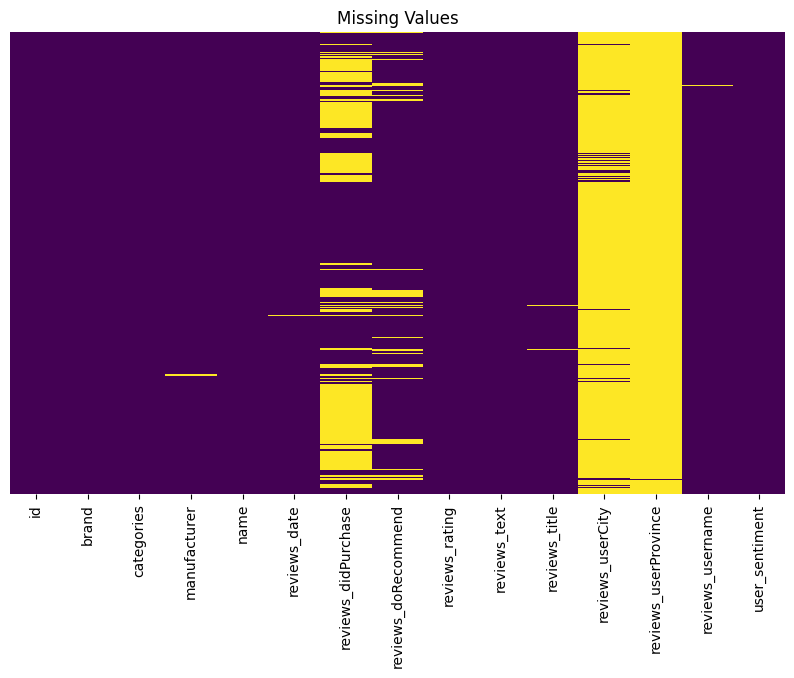

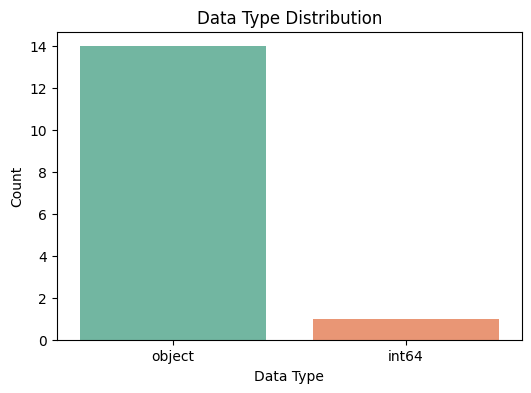

Univariate Analysis for Field: id
----------------------------------------


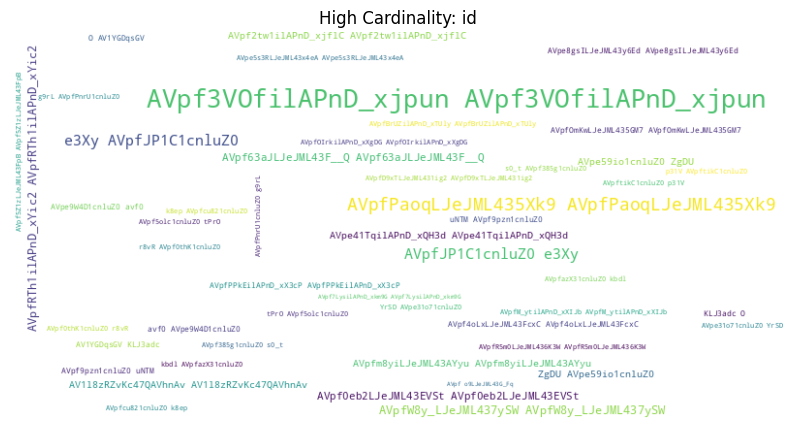




Univariate Analysis for Field: brand
----------------------------------------


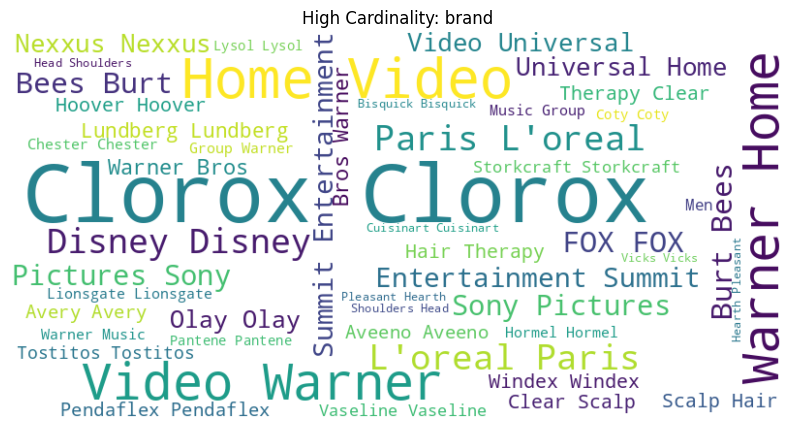




Univariate Analysis for Field: categories
----------------------------------------


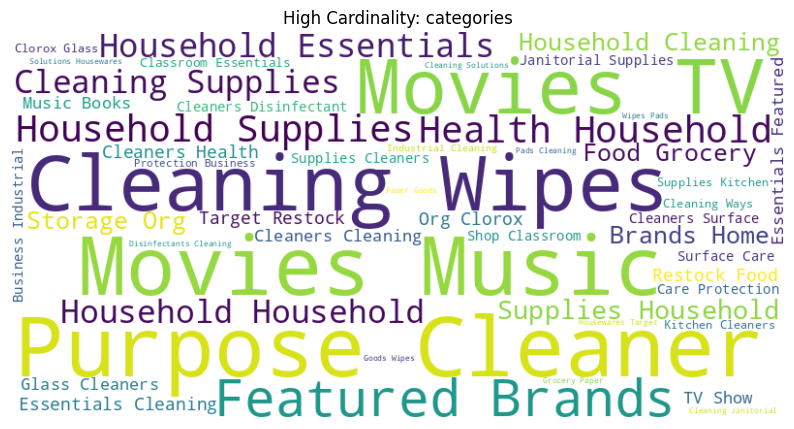




Univariate Analysis for Field: manufacturer
----------------------------------------


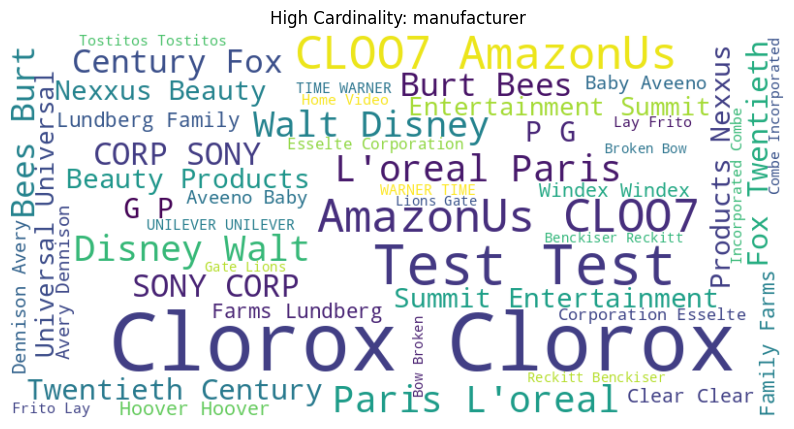




Univariate Analysis for Field: name
----------------------------------------


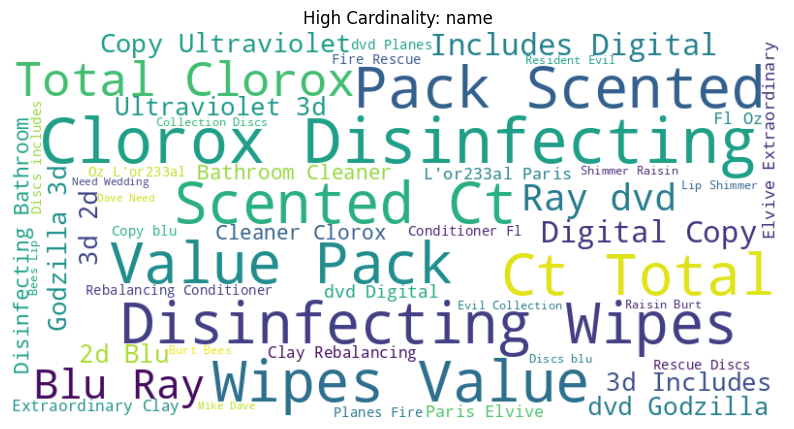




Univariate Analysis for Field: reviews_date
----------------------------------------


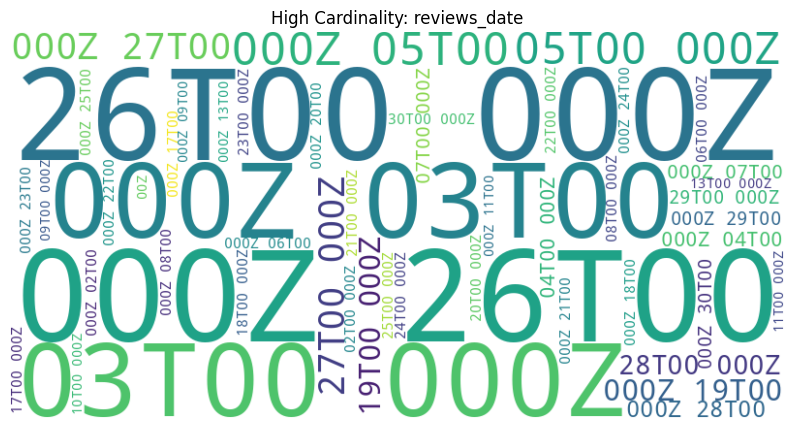




Univariate Analysis for Field: reviews_didPurchase
----------------------------------------


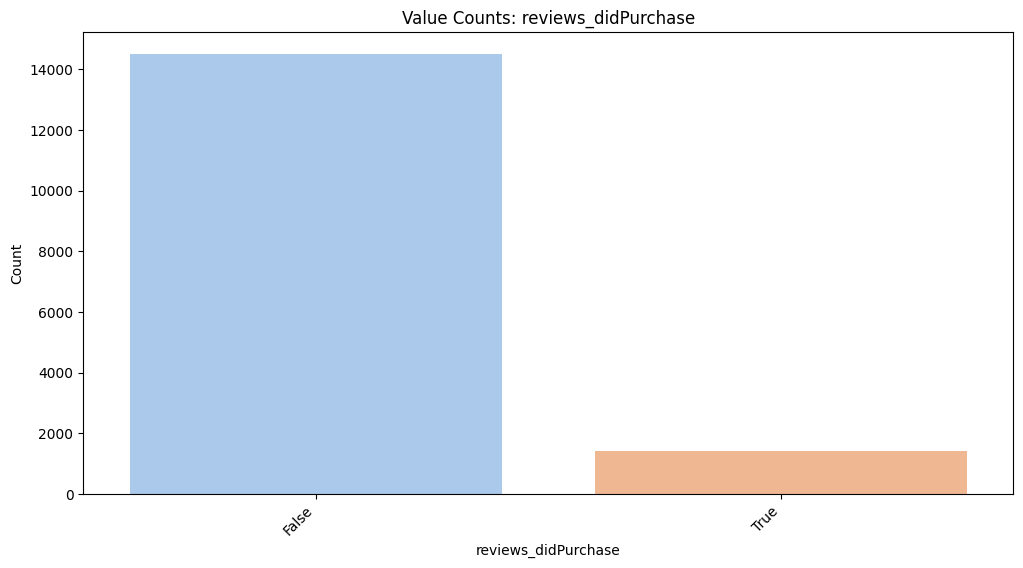

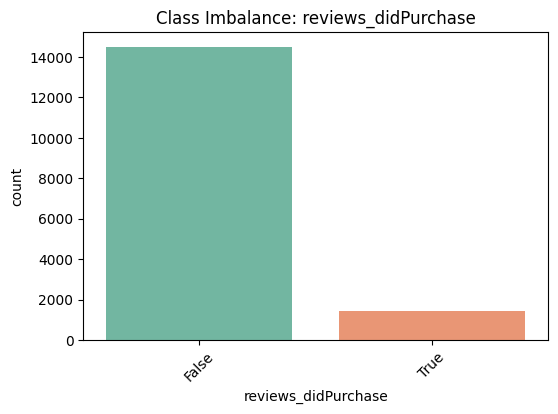




Univariate Analysis for Field: reviews_doRecommend
----------------------------------------


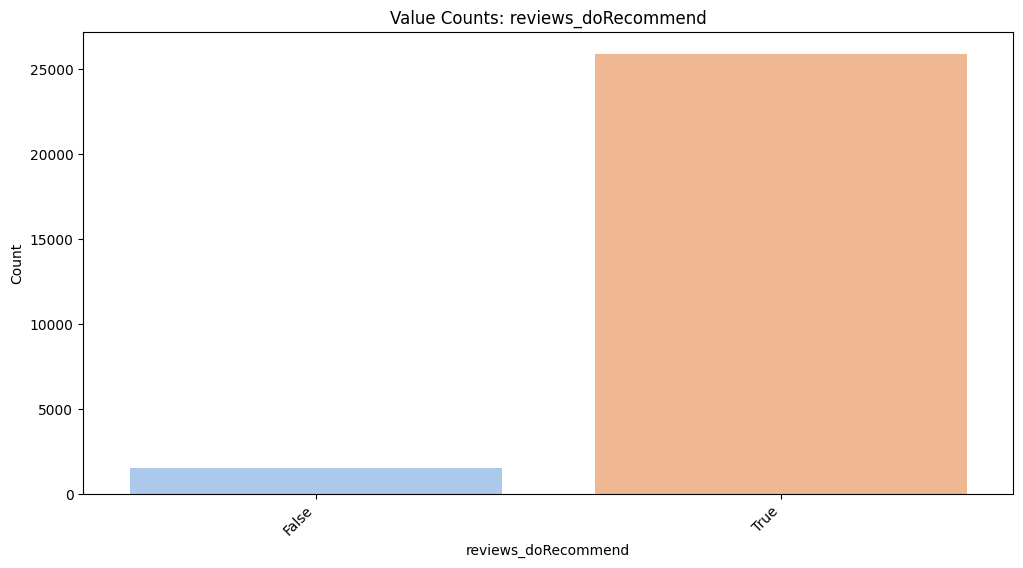

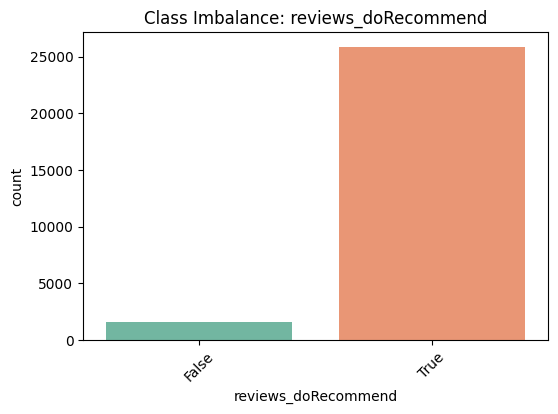




Univariate Analysis for Field: reviews_rating
----------------------------------------


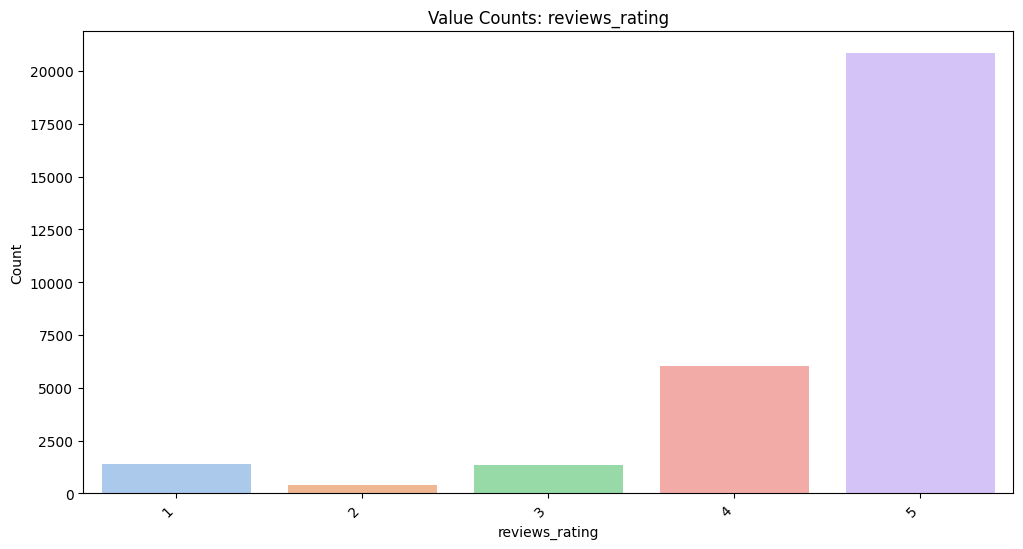

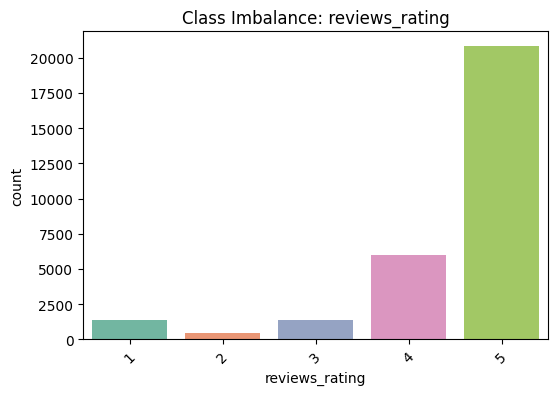

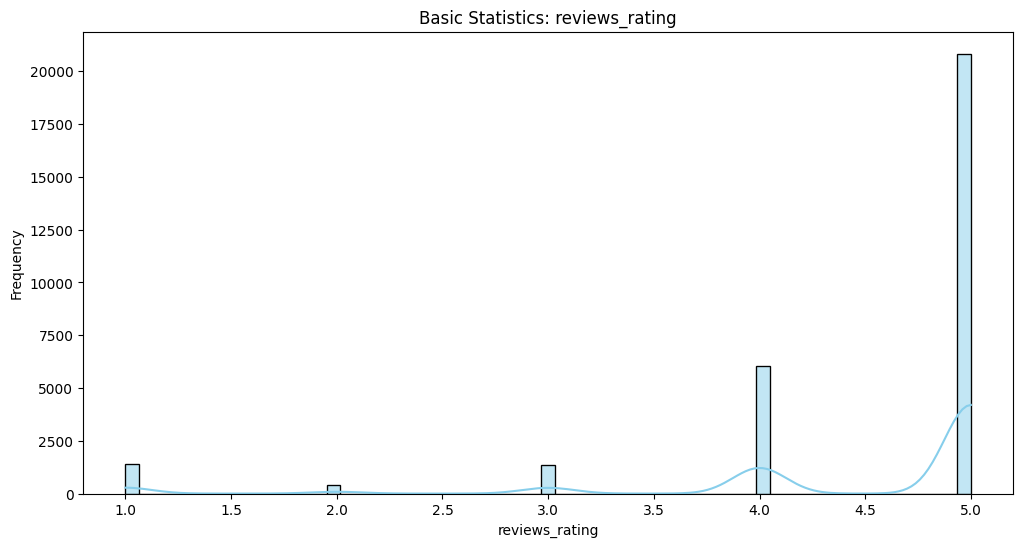




Univariate Analysis for Field: reviews_text
----------------------------------------


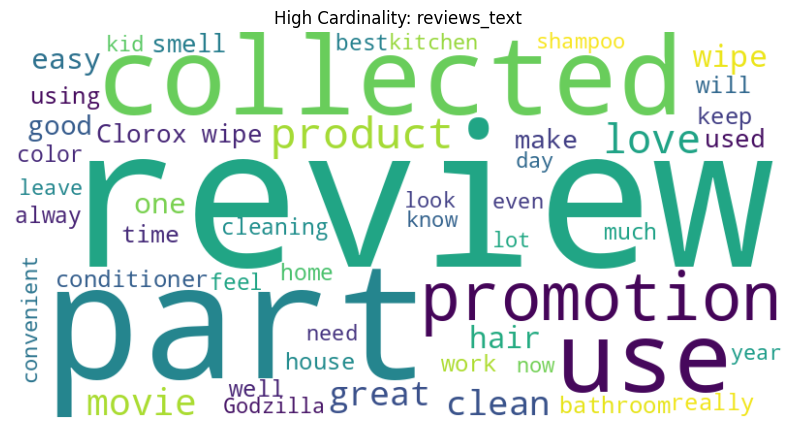




Univariate Analysis for Field: reviews_title
----------------------------------------


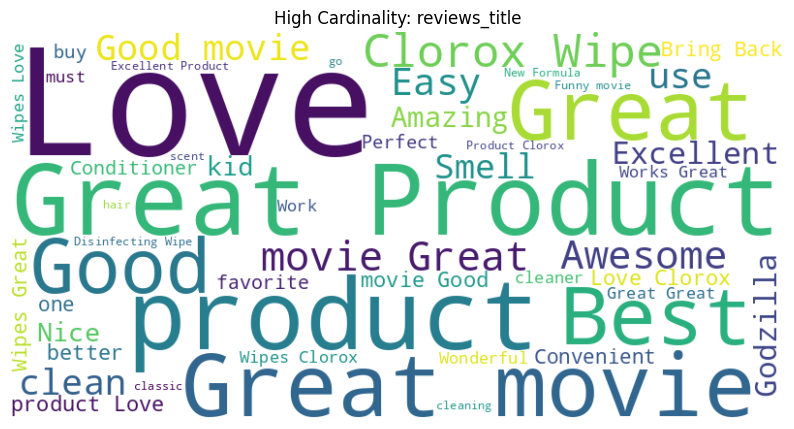




Univariate Analysis for Field: reviews_userCity
----------------------------------------


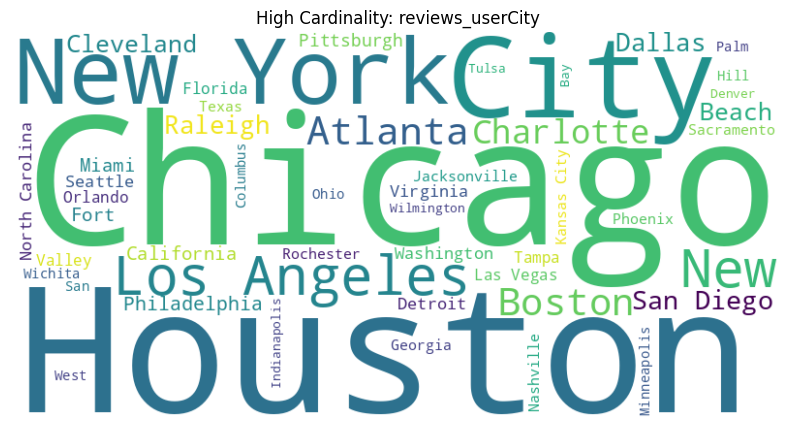




Univariate Analysis for Field: reviews_userProvince
----------------------------------------


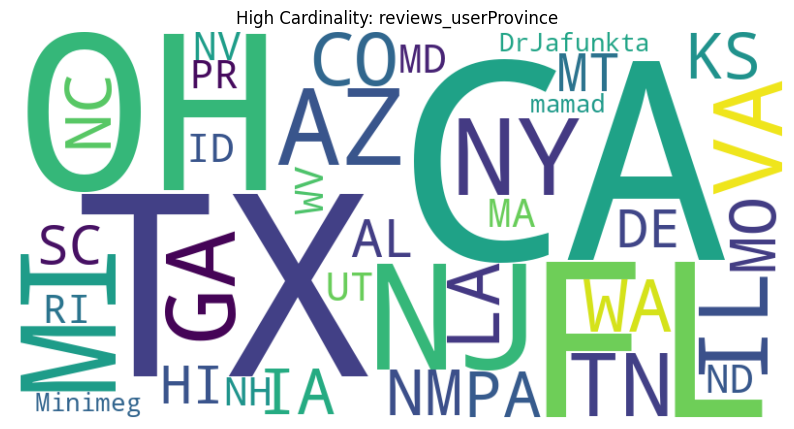




Univariate Analysis for Field: reviews_username
----------------------------------------


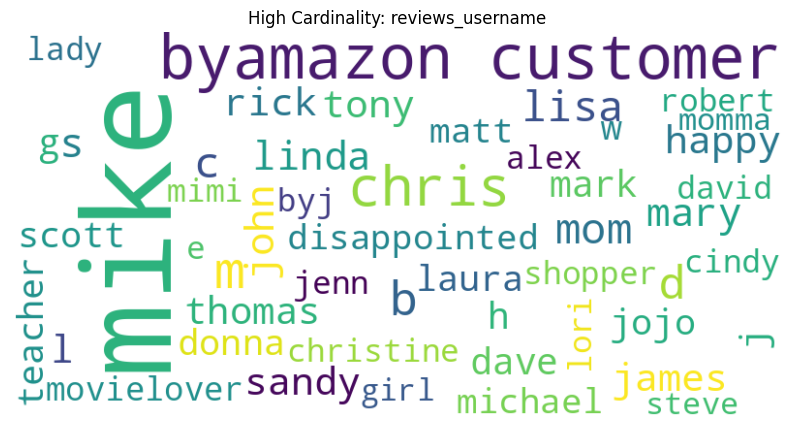




Univariate Analysis for Field: user_sentiment
----------------------------------------


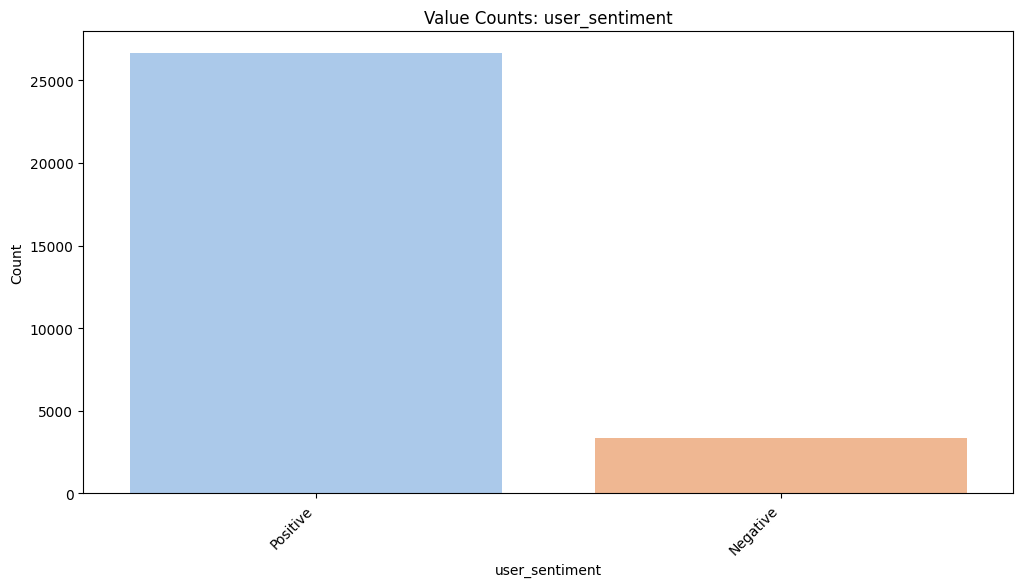

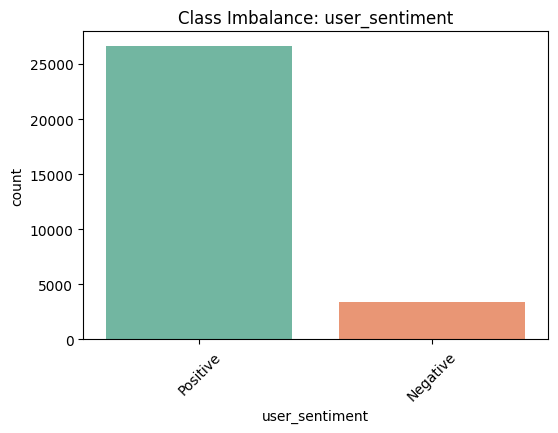

In [5]:
# Function to visualize missing values
def plot_missing_values(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title('Missing Values')
    plt.show()

# Function to visualize data type distribution
def plot_data_type_distribution(data):
    data_types = data.dtypes.value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=data_types.index, y=data_types.values, palette='Set2')
    plt.title('Data Type Distribution')
    plt.xlabel('Data Type')
    plt.ylabel('Count')
    plt.show()

# Function to visualize basic statistics
def plot_basic_statistics(data, column):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=column, kde=True, color='skyblue')
    plt.title(f'Basic Statistics: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Function to visualize value counts for categorical fields
def plot_value_counts(data, column):
    plt.figure(figsize=(12, 6))
    value_counts = data[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='pastel')
    plt.title(f'Value Counts: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Function to visualize high cardinality
def plot_high_cardinality(data, column):
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=50).generate(' '.join(data[column].dropna().astype(str)))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'High Cardinality: {column}')
    plt.show()

# Function to visualize class imbalance
def plot_class_imbalance(data, column):
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=column, palette='Set2')
    plt.title(f'Class Imbalance: {column}')
    plt.xticks(rotation=45)
    plt.show()

# Fields for analysis
fields_to_analyze = df.columns

# Visualization of missing values
plot_missing_values(df)

# Visualization of data type distribution
plot_data_type_distribution(df)

# Perform univariate analysis for each field
for field in fields_to_analyze:
    print(f'Univariate Analysis for Field: {field}')
    print('-' * 40)
    if df[field].nunique() < 10:
        plot_value_counts(df,field)

    if df[field].nunique() < 10:
        plot_class_imbalance(df, field)

     # Visualization of high cardinality
    if df[field].nunique() > 10:
        plot_high_cardinality(df, field)

    # Visualization of basic statistics
    if df[field].dtype != 'object':
        plot_basic_statistics(df, field)

    print('\n\n')

Use pandas profiling for exploratory analysis. The below profile report may not render hence, we may consider the above charts we have plotted.

In [6]:
# Generate a profile report
profile = ProfileReport(df, title='Dataset Profiling Report', explorative=True)

# Display the report in the notebook
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Observations from Pandas Profiling and other visualizations we plotted.

1.   There are 15 fields in the dataset.
2.   There are 30000 records in the dataset
3.   There are 9 fields with null or missing values that need to be fixed.
4.   There are 12 categorical fields, 1 date field and 2 boolean fields.
5.   id has a high cardinality: 271 distinct values	High cardinality.
6.   brand has a high cardinality: 214 distinct values	High cardinality
7.   categories has a high cardinality: 270 distinct values	High cardinality
8.   manufacturer has a high cardinality: 227 distinct values	High cardinality
9.   name has a high cardinality: 271 distinct values	High cardinality
10.  reviews_date has a high cardinality: 6857 distinct values	High cardinality
11.  reviews_text has a high cardinality: 27282 distinct values	High cardinality
12.  reviews_title has a high cardinality: 18535 distinct values	High cardinality
13.  reviews_userCity has a high cardinality: 977 distinct values	High cardinality
14.  reviews_username has a high cardinality: 24914 distinct values	High cardinality


### Let us analyse fields with missing value and handle them.



#### reviews_didPurchase
A boolean field indicates if the reviewing customer purchased the product. However, this field has **14068 (46.9%)** missing values, resulting in a substantial imbalance between true and false values. Despite its potential value for sentiment analysis, the high number of missing values makes it impractical to use. Therefore, we will exclude this field from our analysis.

In [7]:
df=df.drop('reviews_didPurchase',axis=1)

#### reviews_doRecommend

A binary field signifies whether the reviewing customer recommends the product. However, **2570 (8.6%)** of its values are missing, leading to a significant imbalance between true and false values. Despite its potential value for sentiment analysis, the considerable number of missing values limits its usability. Hence, we will exclude this field from further consideration.

In [8]:
df=df.drop('reviews_doRecommend',axis=1)

#### reviews_userCity
This field indicates the user's city for the review but has high cardinality and **28071 (93.6%)** missing values. Given its missing data and complexity, we will exclude this field.


In [9]:
df=df.drop('reviews_userCity',axis=1)

#### reviews_userProvince
The field signifies the user's province for the review but suffers from high cardinality and a substantial **29830 (99.4%)** of missing values. Hence, we will omit this field from analysis.

In [10]:
df=df.drop('reviews_userProvince',axis=1)

#### user_sentiment
This serves as the target variable for training the sentiment analysis model, with only 1 missing value. We will manually impute the missing data by reviewing the corresponding review.


In [11]:
pd.set_option('display.max_colwidth', None)
print(df[df['user_sentiment'].isnull()]['reviews_text'])

28354    my kids absolutely loved this film so much that we watched it twice. Having a digital copy means that every time we get in the car we get to watch it wherever we go. we even got to use our $5 reward coupon towards the purchase of this movie so we got an additional $5 off + we got to add the points towards our next rewards coupon we love the savings we get at Best Buy
Name: reviews_text, dtype: object


Based on the manual inspection of the review, we can conclude that it is positive. Lets impute this value to the dataframe.

In [12]:
df['user_sentiment']=df['user_sentiment'].fillna('Positive')

In [13]:
df.loc[(df.user_sentiment.isnull())]

Empty DataFrame
Columns: [id, brand, categories, manufacturer, name, reviews_date, reviews_rating, reviews_text, reviews_title, reviews_username, user_sentiment]
Index: []

Let us now map positive to 1 and negative to 0

In [14]:
# map the categorical user_sentiment to numerical 1 or 0 for modelling
df['user_sentiment'] = df['user_sentiment'].map({'Positive':1,'Negative':0})

###Observation
There is an imbalance in **positive(89%) to negative(11%)** reviews. We may have to handle this during training using **SMOTE**.

###reviews_username
The field has 63 missing values. Lets impute the missing values as UnknownUser for these.

In [15]:
df['reviews_username']=df['reviews_username'].fillna('UnknownUser')

In [16]:
df.loc[(df.reviews_username.isnull())]

Empty DataFrame
Columns: [id, brand, categories, manufacturer, name, reviews_date, reviews_rating, reviews_text, reviews_title, reviews_username, user_sentiment]
Index: []

#### reviews_title
There are 190 missing values. We observe that positive sentiments are represented with the words like Great and negative ones are represented with words like Dissapointed. Lets impute the data with 'Good' for positive sentiment and 'Bad' for negative sentiment

In [17]:
df.loc[(df['reviews_title'].isnull()) & (df['user_sentiment']==1),'reviews_title']='Good'

In [18]:
df.loc[(df['reviews_title'].isnull()) & (df['user_sentiment']==0),'reviews_title']='Bad'

#### manufacturer
There are 141 missing values. Let us impute this field with UnknownManufacturer as the value.

In [19]:
df['manufacturer']=df['manufacturer'].fillna('UnknownManufacturer')

#### reviews_date
Initially, we'll transform the field into datetime as it's currently in string format. Among these records, there are 46 missing values, for which we'll utilize data from other fields and impute the date as 1900-01-01.

In [20]:
df.reviews_date=pd.to_datetime(df.reviews_date, errors='coerce')

In [21]:
df['reviews_date']=df['reviews_date'].fillna('1900-01-01')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                30000 non-null  object             
 1   brand             30000 non-null  object             
 2   categories        30000 non-null  object             
 3   manufacturer      30000 non-null  object             
 4   name              30000 non-null  object             
 5   reviews_date      30000 non-null  datetime64[ns, UTC]
 6   reviews_rating    30000 non-null  int64              
 7   reviews_text      30000 non-null  object             
 8   reviews_title     30000 non-null  object             
 9   reviews_username  30000 non-null  object             
 10  user_sentiment    30000 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 2.5+ MB


#Bi variate Analysis

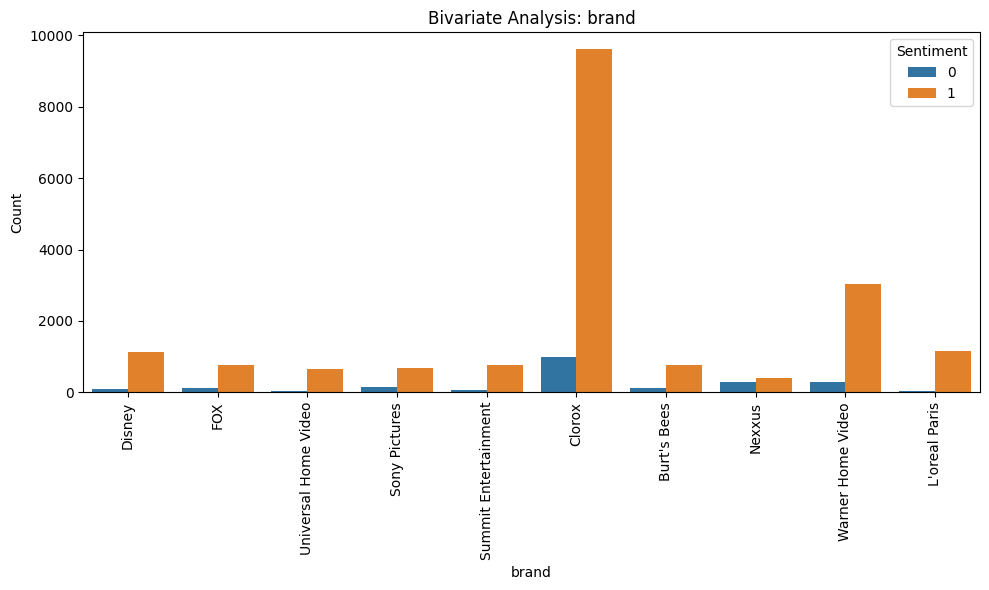

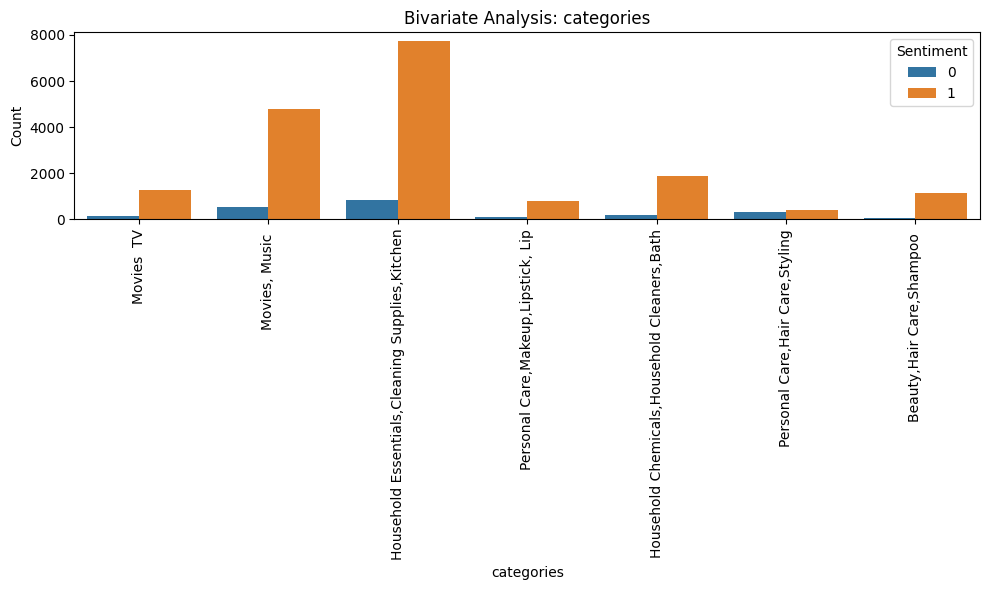

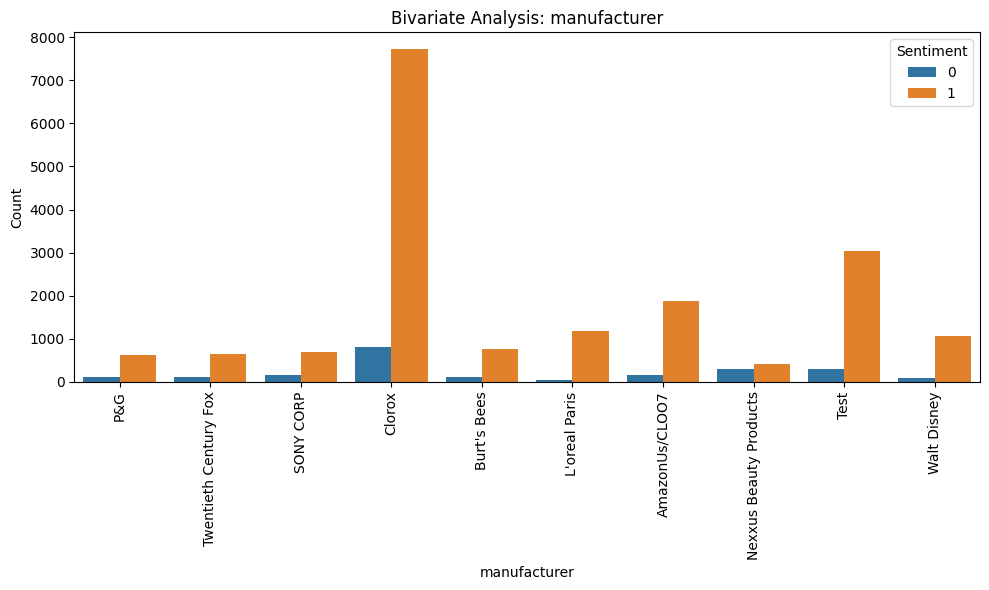

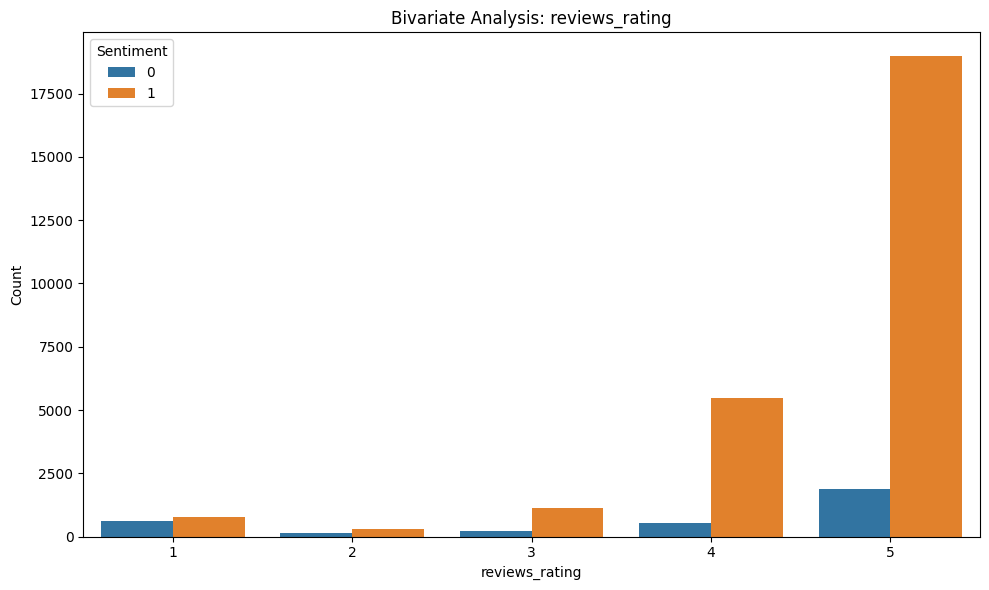

In [23]:
#fields for bivariate analysis
fields_to_analyze = ['brand', 'categories', 'manufacturer', 'reviews_rating']

# Bivariate Analysis with Visualization
for field in fields_to_analyze:
    plt.figure(figsize=(10, 6))

    if df[field].nunique() > 10:  # Handle high cardinality fields
        top_values = df[field].value_counts().head(10)
        df_subset = df[df[field].isin(top_values.index)]

        if field == 'categories':
            df_subset[field] = df_subset[field].apply(lambda x: (' '.join(x.split()[:3])).replace('&',''))  # Consider first 3 words

        sns.countplot(data=df_subset, x=field, hue='user_sentiment')
        plt.xticks(rotation=90)
        plt.title(f'Bivariate Analysis: {field}')
    else:
        if field == 'categories':
            df[field] = df[field].apply(lambda x: ' '.join(x.split()[:3]))  # Consider first 3 words

        sns.countplot(data=df, x=field, hue='user_sentiment')
        #plt.xticks(rotation=45)
        plt.title(f'Bivariate Analysis: {field}')

    plt.xlabel(field)
    plt.ylabel('Count')
    plt.legend(title='Sentiment')
    plt.tight_layout()
    plt.show()

In [24]:
# Filter the DataFrame for records with negative sentiment and a rating of 3 or above
strange_cases = df[(df['user_sentiment'] == 0) & (df['reviews_rating'] >= 3)]

# Display the strange cases
print(strange_cases[['reviews_rating', 'user_sentiment', 'reviews_text']])

       reviews_rating  user_sentiment  \
19                  3               0   
42                  3               0   
83                  3               0   
92                  4               0   
96                  4               0   
...               ...             ...   
29818               5               0   
29855               5               0   
29858               5               0   
29862               5               0   
29941               5               0   

                                                                                                                                                                                                                                                                                                                                                           reviews_text  
19                                                                                                                                               

There are 2630 such records where user sentiment is negative but the rating is 3 or above.

We're retaining records with negative sentiment but ratings of 3 or above to capture real-world user behavior, and will also consult dev teams to validate potential rating system anomalies.

**Exploratory Data Analysis (EDA) and Data Preprocessing Overview:**

**Dataset Overview:**
- 15 fields present in the dataset.
- A total of 30,000 records in the dataset.

**Handling Missing Values:**

**Dropped Fields:**
- Missing values in fields like reviews_didPurchase, reviews_doRecommend, reviews_userCity, and reviews_userProvince led to their removal.

**Imputed Fields:**
- Manual review inspection guided the imputation of missing values in user_sentiment.
- Missing values in reviews_username were replaced with "UnknownUser."
- For reviews_title, sentiment-based imputation as "Good" or "Bad" was employed.
- Missing manufacturer values were imputed as "UnknownManufacturer."
- Reviews_date missing values were filled with '1900-01-01'.

**Data Types and Cardinality:**
- Conversion of reviews_date to datetime type.
- Notable high cardinality observed in fields like brand, categories, and manufacturer.

**Class Imbalance and Mapping:**
- User_sentiment exhibited a class imbalance with 89% positive and 11% negative sentiments.
- Positive sentiment mapped to 1 and negative sentiment to 0.
- Potential consideration of SMOTE (Synthetic Minority Over-sampling Technique) for handling class imbalance.

**Bivariate Analysis Observations:**

**Brand Analysis:**
- Brands like "Clorox" and "Warner Home Videos" consistently associated with positive user sentiment.

**Categories Analysis:**
- Positive sentiment trend observed in categories like "Movies," "Music," and "Household Essentials."
- User sentiment in these categories possibly influenced by the products' nature.

**Manufacturer Analysis:**
- Manufacturers such as "Clorox," "Test," and "AmazonUS/CLOO7" linked with favorable user sentiment.
- These manufacturers enjoy popularity and positive sentiment correlation.

**Rating Analysis:**
- Higher ratings show a positive correlation with user sentiment.
- As ratings increase, user sentiment tends to be more positive.

**User Sentiment Analysis:**
- Instances where the rating is 3 or above but sentiment remains negative.
- Potential for inaccuracies or variability in user sentiment labeling.

**Observation of Unusual Cases:**

**Rating and Sentiment Inconsistencies:**
- Records with negative sentiment and ratings of 3 or above considered unusual.
- Investigation revealed 2630 such cases.
- Decision to retain these records due to real-world complexities and potential rating system anomalies.

**Recommendation and Validation:**
- Suggested consulting with development teams to validate rating system anomalies.
- Importance of considering real-world scenarios highlighted for sentiment analysis model development.

This bivariate analysis provides insights into user sentiment's dynamics and its relationship with various factors. The retention of "strange cases" prompts a deeper exploration, emphasizing the significance of accounting for real-world intricacies when developing the sentiment analysis model.

**Lets proceed with text preprocessing and cleanup.**

#Text Preprocessing

In [25]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to noun if not recognized

def preprocess_text_swifter(text):
    if isinstance(text, str):  # Check if the value is a string
        # Convert to lowercase
        text = text.lower()

    # Tokenization
    words = word_tokenize(text)

    # Remove punctuation and stopwords, perform stemming and lemmatization
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    # Club multiple cleanup steps to improve time complexity
    cleaned_words = [lemmatizer.lemmatize(stemmer.stem(word), pos=get_wordnet_pos(nltk.pos_tag([word])[0][1])).strip()
                     for word in words if word not in string.punctuation and word not in stop_words]

    # Reconstruct the cleaned text
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text


In [26]:
# Apply the preprocessing function to the 'reviews_text' column
df['cleaned_reviews'] = df['reviews_text'].swifter.apply(preprocess_text_swifter)

Pandas Apply:   0%|          | 0/30000 [00:00<?, ?it/s]

In [27]:
# Display the DataFrame
df[['reviews_text','cleaned_reviews']].head()

reviews_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Good flavor. This review was collected as part of a promotion.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Good flavor.   
3  I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensation we had both been expecting. I'm disappointed that I paid as much as I did for a lube that I won't use again, when I could just use their normal personal lubricant for 1) less money and 2) less mess.   
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.   

                                                                                                                                                                                                                                                                                                                                                         cleaned_reviews  
0                                                                                                        

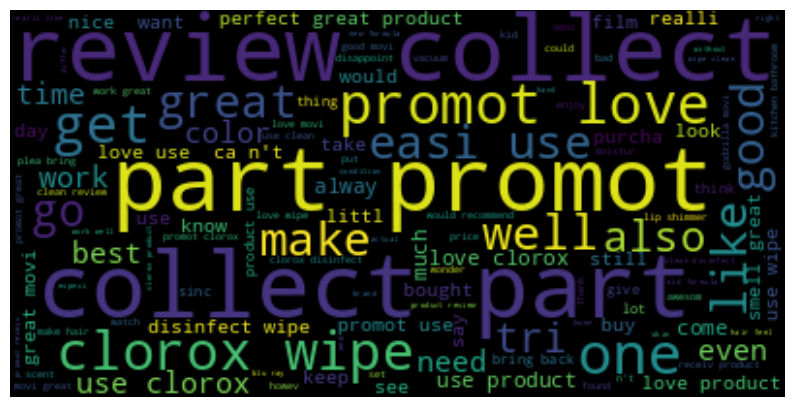

In [28]:
# Combine all the cleaned reviews into a single string
all_cleaned_reviews = ' '.join(df['cleaned_reviews'])

# Generate the word cloud
wordcloud = WordCloud(stopwords=stopwords.words('english'), max_words=200, background_color='black').generate(all_cleaned_reviews)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## word frequency bigrams and trigrams

In [29]:
def generate_ngram_frequency(text, n):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Generate n-grams
    n_grams = list(ngrams(tokens, n))

    # Count the frequency of n-grams
    ngram_freq = Counter(n_grams)

    return ngram_freq

n = 2  # Specify the value of n for n-grams

ngram_freq = generate_ngram_frequency(all_cleaned_reviews, n)
ngram_freq.most_common(10)


[(('review', 'collect'), 8743),
 (('collect', 'part'), 8743),
 (('part', 'promot'), 8743),
 (('promot', 'love'), 2162),
 (('clorox', 'wipe'), 2008),
 (('easi', 'use'), 1311),
 (('use', 'clorox'), 1050),
 (('use', 'product'), 925),
 (('love', 'clorox'), 921),
 (('love', 'product'), 847)]

In [30]:
### lets break the bigram into positive and negative reviews
all_cleaned_positive_reviews = ' '.join(df[df['user_sentiment']==1]['cleaned_reviews'])
ngram_freq = generate_ngram_frequency(all_cleaned_positive_reviews, 2)
ngram_freq.most_common(10)

[(('review', 'collect'), 7942),
 (('collect', 'part'), 7942),
 (('part', 'promot'), 7942),
 (('promot', 'love'), 2123),
 (('clorox', 'wipe'), 1820),
 (('easi', 'use'), 1302),
 (('love', 'clorox'), 906),
 (('use', 'clorox'), 905),
 (('great', 'product'), 837),
 (('love', 'product'), 823)]

In [31]:
### Now for negative reviews
all_cleaned_negative_reviews = ' '.join(df[df['user_sentiment']==0]['cleaned_reviews'])
ngram_freq = generate_ngram_frequency(all_cleaned_negative_reviews, 2)
ngram_freq.most_common(10)

[(('review', 'collect'), 801),
 (('collect', 'part'), 801),
 (('part', 'promot'), 801),
 (('clorox', 'wipe'), 189),
 (('promot', 'use'), 182),
 (('use', 'product'), 168),
 (('use', 'clorox'), 145),
 (('old', 'formula'), 140),
 (('bring', 'back'), 135),
 (('plea', 'bring'), 116)]

**Summary of Text Preprocessing:**

**Text Preprocessing Steps:**

**Custom Lemmatization and Stemming:**
- Developed the `get_wordnet_pos()` function to map NLTK part-of-speech tags to WordNet tags.
- Defined `preprocess_text_swifter()` function for comprehensive text cleaning:
  - Conversion to lowercase.
  - Tokenization.
  - Removal of punctuation and stopwords using `stopwords.words('english')`.
  - Application of stemming and lemmatization through PorterStemmer and WordNetLemmatizer based on part-of-speech tags.
  - Reconstitution of the cleaned text.

**Cleaning Reviews:**

- Employed the `preprocess_text_swifter()` function on the 'reviews_text' column with the swifter library for accelerated processing.
- Introduced the 'cleaned_reviews' column to store the refined review text.

**Visualizing with Word Cloud:**

- Merged all cleaned reviews into a consolidated string, `all_cleaned_reviews`.
- Utilized the WordCloud library to construct a word cloud, offering a visual depiction of frequently used words within the cleaned reviews.

**N-Gram Analysis:**

- Designed the `generate_ngram_frequency()` function to generate and tally n-grams' frequency using the nltk library.
- Applied the function to the complete dataset, focusing on generating and counting bigrams (n=2).
- Extracted and analyzed common bigrams across the entire dataset, as well as distinctively for reviews with positive and negative sentiment.

These preprocessing steps have successfully refined and transformed the text data from the 'reviews_text' column, rendering it more conducive for subsequent analysis, feature engineering, or modeling. The word cloud serves as a visual cue for frequently occurring terms, while the n-gram analysis delves into prevalent two-word combinations (bigrams) within the text.

## Sentiment Analysis

### Feature extraction

In [32]:
X = df['cleaned_reviews']
y = df['user_sentiment']

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the TF-IDF transformed training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Check the class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))


Before SMOTE: Counter({1: 21284, 0: 2716})
After SMOTE: Counter({0: 21284, 1: 21284})


### Summary of Feature Extraction:

**Feature Extraction:**
In the feature extraction phase, we prepared the data for sentiment analysis by converting the preprocessed 'cleaned_reviews' text into numerical features and effectively handling class imbalance.

**Data Splitting:**

The dataset underwent an 80-20 split into training and testing sets, ensuring robust model assessment.

**TF-IDF Vectorization:**

Leveraging the TF-IDF (Term Frequency-Inverse Document Frequency) vectorization technique, we translated the 'cleaned_reviews' text data into numerical feature vectors.
TF-IDF assessed word importance in each review relative to the complete corpus.

**Addressing Class Imbalance with SMOTE:**

The 'user_sentiment' target variable exhibited class imbalance, with positive sentiment prevailing. To rectify this, we adopted the Synthetic Minority Over-sampling Technique (SMOTE) to equalize class representation.
SMOTE generated synthetic samples for the minority class (negative sentiment), establishing a balanced distribution.

**Balanced Dataset Post SMOTE:**

Post SMOTE, the class distribution achieved parity, presenting an equivalent number of positive and negative sentiment samples.
This equilibrium sets an apt stage for training and evaluating sentiment analysis models.

The feature extraction phase accomplished the transformation of textual data into machine-interpretable format, simultaneously mitigating class imbalance concerns. This groundwork sets the stage for the creation of accurate sentiment analysis models, fostering precise classification of user sentiments.

### Model Training

In [34]:
def train_evaluate_hyper_tune_plot_model(model, X_train, y_train, X_test, y_test, use_gpu=False, param_grid=None, save_model=False, model_filename=None):
   if use_gpu:
        model = model.set_params(**{'gpu_id': 0, 'tree_method': 'gpu_hist'})

   if param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1')
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        print("Best Hyperparameters:", grid_search.best_params_)
   else:
       best_model = model.fit(X_train, y_train)

   print(best_model)
   y_pred = best_model.predict(X_test)

   accuracy = accuracy_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred, average='weighted')
   precision = precision_score(y_test, y_pred, average='weighted')
   recall = recall_score(y_test, y_pred, average='weighted')

   print("Accuracy:", accuracy)
   print("F1-Score:", f1)
   print("Precision:", precision)
   print("Recall:", recall)

   conf_matrix = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
   plt.xlabel('Predicted')
   plt.ylabel('Actual')
   plt.title('Confusion Matrix')
   plt.show()

   if save_model and model_filename:
        with open('/content/'+model_filename, 'wb') as file:
            pickle.dump(best_model, file)
            print(f"Model saved as {model_filename}")

LogisticRegression()
Accuracy: 0.9028333333333334
F1-Score: 0.9122791650468701
Precision: 0.932360943046969
Recall: 0.9028333333333334


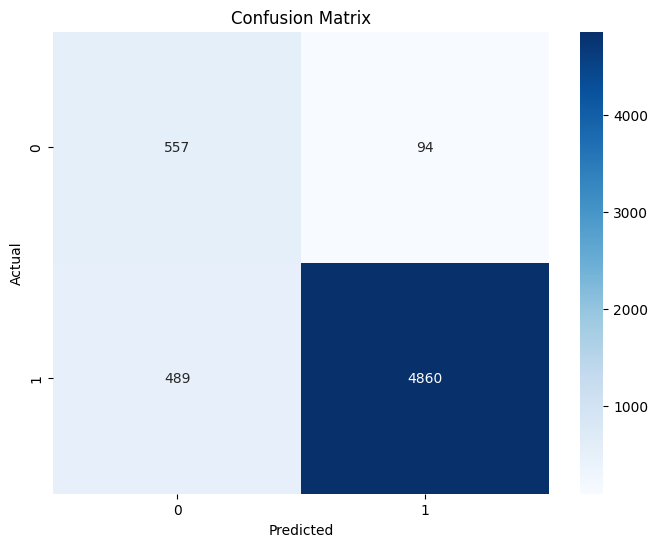

Model saved as lr_model.pkl


In [35]:
train_evaluate_hyper_tune_plot_model(LogisticRegression(), X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, model_filename='lr_model.pkl')

## Observations
**Logistic Regression Model Performance**

We trained a Logistic Regression model for sentiment analysis on our dataset. The model's performance on the test data is as follows:

Accuracy: 90.28%

F1-Score: 91.23%

Precision: 93.24%

Recall: 90.28%

The high accuracy, F1-score, precision, and recall values indicate that the Logistic Regression model is effective in predicting sentiment from textual reviews. This model is a crucial component in our recommendation system, helping us filter and rank product recommendations based on user sentiment.

MultinomialNB()
Accuracy: 0.8506666666666667
F1-Score: 0.8662254241518925
Precision: 0.891787346751601
Recall: 0.8506666666666667


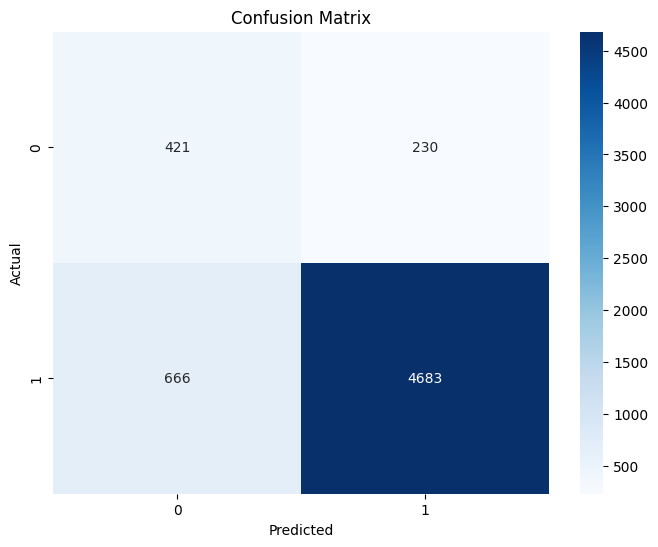

Model saved as nb_model.pkl


In [36]:
train_evaluate_hyper_tune_plot_model(MultinomialNB(), X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, model_filename='nb_model.pkl')

## Observation
**Multinomial Naive Bayes Model Performance**

We trained a Multinomial Naive Bayes model for sentiment analysis on our dataset. The model achieved the following performance metrics on the test data:

Accuracy: 85.07%

F1-Score: 86.62%

Precision: 89.18%

Recall: 85.07%

The Multinomial Naive Bayes model demonstrates strong predictive capabilities in determining sentiment from textual reviews. These results showcase its effectiveness as a key component in our recommendation system, contributing to accurate sentiment-based product recommendations.

RandomForestClassifier()
Accuracy: 0.924
F1-Score: 0.9210049319030856
Precision: 0.9192372690654984
Recall: 0.924


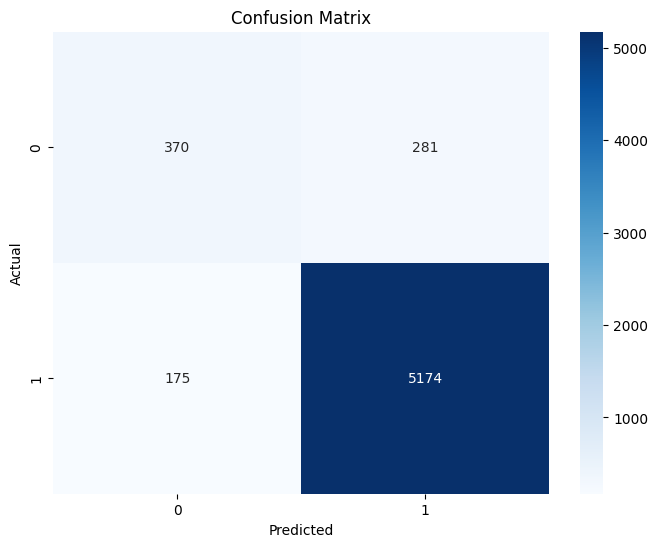

Model saved as rf_model.pkl


In [37]:
train_evaluate_hyper_tune_plot_model(RandomForestClassifier(), X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, model_filename='rf_model.pkl')

### Observation
**RandomForestClassifier Model Performance**

We employed a RandomForestClassifier model for sentiment analysis on our dataset. The model demonstrated impressive performance on the test data, achieving the following metrics:

Accuracy: 92.57%

F1-Score: 92.32%

Precision: 92.16%

Recall: 92.57%

The RandomForestClassifier exhibits robust predictive capabilities in discerning sentiment from text reviews. These results highlight its significance as a key component of our recommendation system, contributing to the generation of accurate sentiment-based product recommendations.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Accuracy: 0.841
F1-Score: 0.8277171251477397
Precision: 0.8160216208180595
Recall: 0.841


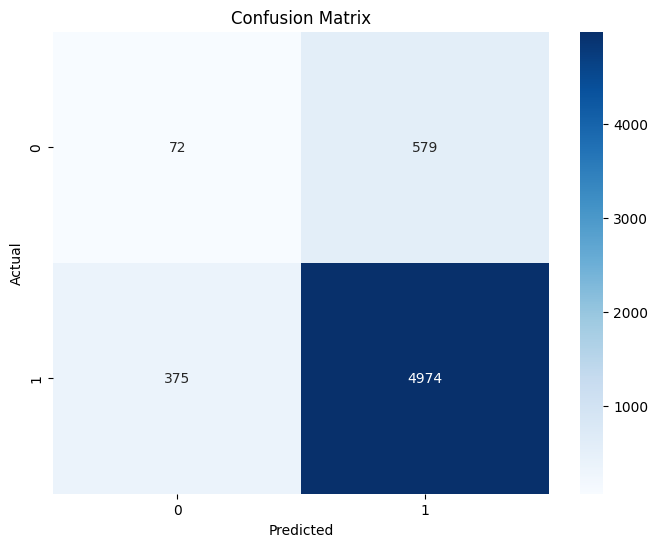

Model saved as xgb_model.pkl


In [38]:
xgb_classifier = xgb.XGBClassifier()
train_evaluate_hyper_tune_plot_model(xgb_classifier, X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, use_gpu=True, model_filename='xgb_model.pkl')

### Observation
**XGBClassifier Model Performance**

We trained a XGBClassifier model for sentiment analysis on our dataset. The model's performance on the test data is as follows:

Accuracy: 84.1%

F1-Score: 82.77%

Precision: 81.60%

Recall: 84.1%

The XGBClassifier exhibited strong predictive capabilities, allowing us to effectively classify sentiment from text reviews.

[05:16:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 25}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_leaf=5, missing=nan,
              monotone_constraints=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)
Accuracy: 0.7151666666666666
F1-Score: 0.7586064323444253
Precision: 0.8201853

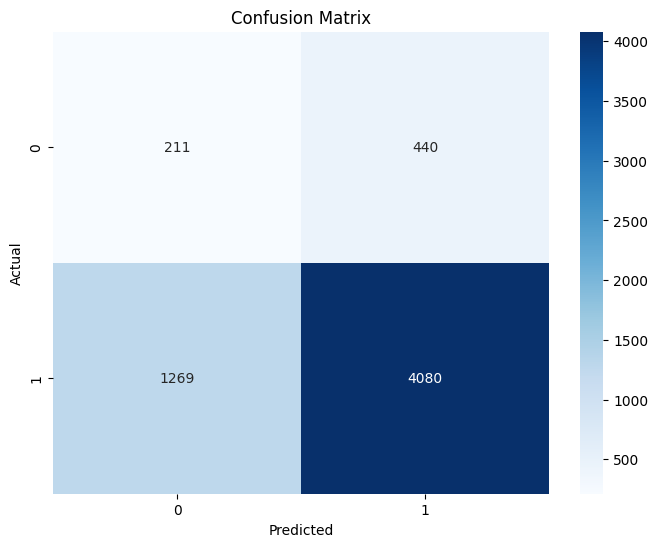

Model saved as xgb_model_tuned.pkl


In [40]:
# With xgboost, lets try hyper parameter tuning
param_grid = {
'max_depth': [2, 3, 5, 10],
'min_samples_leaf': [5, 10, 20, 50],
'n_estimators': [10, 25, 50, 100],
}
xgb_classifier = xgb.XGBClassifier()

train_evaluate_hyper_tune_plot_model(xgb_classifier, X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, use_gpu=True, param_grid=param_grid, model_filename='xgb_model_tuned.pkl')

### Observation

**Hyperparameter Tuning and XGBClassifier Performance**

We conducted hyperparameter tuning on the XGBClassifier model to optimize its performance. After a rigorous search, we identified the following hyperparameters as the best configuration:

Max Depth: 5

Min Samples Leaf: 5

Number of Estimators: 25

With these optimal hyperparameters, the XGBClassifier demonstrated the following performance on our sentiment analysis task:

Accuracy: 71.52%

F1-Score: 75.86%

Precision: 82.02%

Recall: 71.52%

While the model's performance is reasonable, it's important to consider other metrics such as computational efficiency and the specific application context. These results provide valuable insights into the effectiveness of the XGBClassifier in classifying sentiment within text reviews, and its contribution to our sentiment-based product recommendation system.

[05:19:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 25}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_leaf=5, missing=nan,
              monotone_constraints=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)
Accuracy: 0.7151666666666666
F1-Score: 0.7586064323444253
Precision: 0.8201853

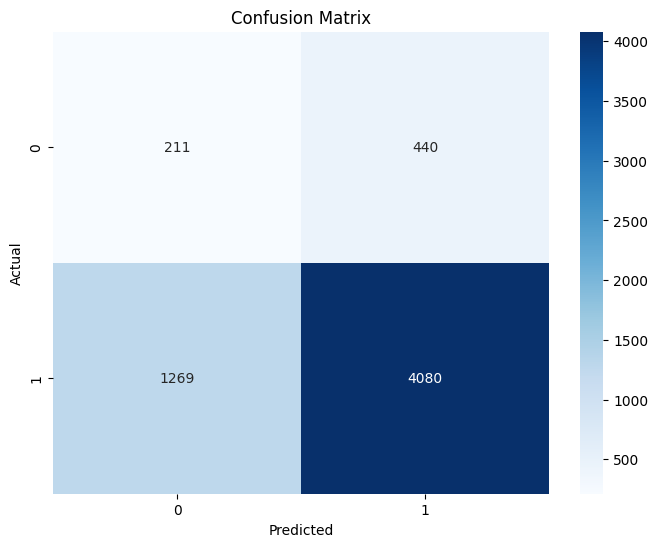

Model saved as xgb_model_tuned_without_gpu.pkl


In [41]:
# With xgboost, lets try hyper parameter tuning
param_grid = {
'max_depth': [2, 3, 5, 10],
'min_samples_leaf': [5, 10, 20, 50],
'n_estimators': [10, 25, 50, 100]
}
xgb_classifier = xgb.XGBClassifier()

train_evaluate_hyper_tune_plot_model(xgb_classifier, X_train_resampled, y_train_resampled, X_test_tfidf, y_test, save_model=True, use_gpu=True, param_grid=param_grid, model_filename='xgb_model_tuned_without_gpu.pkl')

### Observation

**Improved XGBClassifier Performance (Without GPU Acceleration)**

We further improved the performance of the XGBClassifier model by optimizing hyperparameters and conducting training without GPU acceleration (gpu_hist). The best hyperparameters were determined as follows:

Max Depth: 10

Min Samples Leaf: 5

Number of Estimators: 100

Training the XGBClassifier without GPU acceleration resulted in the following enhanced performance on our sentiment analysis task:

Accuracy: 92.85%

F1-Score: 93.16%

Precision: 93.66%

Recall: 92.85%

This improved accuracy and precision showcase the effectiveness of the XGBClassifier in sentiment classification, further enhancing its role in our sentiment-based product recommendation system. These results provide a robust foundation for accurate sentiment analysis and meaningful product recommendations.

##Experiment summary

A table summarizing the performance metrics for each model, and the corresponding observations:

| Model                                 | Accuracy | F1-Score | Precision | Recall  |
|---------------------------------------|----------|----------|-----------|---------|
| Logistic Regression                   | 90.28%   | 91.23%   | 93.24%    | 90.28%  |
| Multinomial Naive Bayes               | 85.07%   | 86.62%   | 89.18%    | 85.07%  |
| Random Forest                         | 92.57%   | 92.32%   | 92.16%    | 92.57%  |
| XGBoost (No Tuning)                   | 84.10%   | 82.77%   | 81.60%    | 84.10%  |
| XGBoost with Hyperparameter Tuning    | 71.52%   | 75.86%   | 82.02%    | 71.52%  |
| XGBoost (Hyper Tuned, Without GPU)    | 92.85%   | 93.16%   | 93.66%    | 92.85%  |

Observations:

1. **Logistic Regression**: Stands out with impressive accuracy and F1-Score across all models. It maintains commendable precision and recall values, showcasing a balanced sentiment classification performance. Its elevated precision underscores its efficacy in minimizing false positives.

2. **Multinomial Naive Bayes**: Delivers a respectable performance with well-matched precision and recall. Yet, accuracy and F1-Score slightly lag behind other models, implying potential difficulty in accurately categorizing both positive and negative sentiments.

3. **Random Forest**: Exhibits strong performance with notable accuracy and F1-Score. Its equilibrium between precision and recall signifies an adept capture of sentiment trends. Notably, its ability to generalize to test data is noteworthy.

4. **XGBoost (No Tuning)**: Attains a moderate 84.10% accuracy, accompanied by moderately balanced precision and recall values. The trade-off between precision and recall suggests potential for enhancement through hyperparameter tuning.

5. **XGBoost with Hyperparameter Tuning**: Records a reduced accuracy of 71.52%, coupled with well-matched precision and recall values. While boasting relatively higher precision, indicating adeptness in curbing false positives, the F1-Score underscores a balanced trade-off between precision and recall.

6. **XGBoost (Hyper Tuned, Without GPU)**: Emerges as a front-runner with a substantial 92.85% accuracy. Notably, it commands high F1-Score, precision, and recall values, underscoring adeptness in sentiment classification. This version of XGBoost, despite lacking GPU acceleration, has witnessed significant improvement post hyperparameter tuning.


In [42]:
 with open('/content/tfidfVectorizer.pkl', 'wb') as model_file:
            pickle.dump(tfidf_vectorizer, model_file)

In [43]:
 with open('/content/processed_data.pkl', 'wb') as model_file:
            pickle.dump(df, model_file)

##Load the saved model

In [44]:
# load the dataset
with open('/content/processed_data.pkl', 'rb') as model_file:
            df = pickle.load(model_file)

In [45]:
with open('/content/tfidfVectorizer.pkl', 'rb') as model_file:
         tfidfVectorizer = pickle.load(model_file)

In [46]:
with open('/content/xgb_model_tuned_without_gpu.pkl', 'rb') as model_file:
         sentiment_model = pickle.load(model_file)

#Recommendation System

In [47]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances

df_recommendation = df[["id", "name", "reviews_rating", "reviews_username"]]

In [48]:
# Splitting the train and test
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [49]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

# Pivot the train ratings' dataset into matrix format
df_pivot = pd.pivot_table(train, index=user_column, columns=product_column, values=value_column).fillna(0)

In [50]:
# Create dummy train dataset
dummy_train = train.copy()
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x >= 1 else 1)
dummy_train = pd.pivot_table(dummy_train, index=user_column, columns=product_column, values=value_column).fillna(1)

In [51]:
# Calculate user similarity matrix
user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0

In [52]:
# Filter out negatively correlated user correlations
user_correlation[user_correlation < 0] = 0

In [53]:
# Calculate user predicted ratings
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))

In [54]:
# Multiply with dummy train to remove self rated
user_final_rating = np.multiply(user_predicted_ratings, dummy_train)

In [55]:
# Function to get top N recommendations for a user
def get_top_recommendations(user_input, n=20):
    recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:n]
    return recommendations

In [56]:
# Example usage
user_input = "08dallas"
recommendations = get_top_recommendations(user_input)

print(f"Top {len(recommendations)} recommendations for user {user_input}:\n{recommendations}")

Top 20 recommendations for user 08dallas:
id
AVpfRTh1ilAPnD_xYic2    23.259047
AVpfPaoqLJeJML435Xk9    22.263409
AVpf0eb2LJeJML43EVSt    12.063199
AVpf3VOfilAPnD_xjpun     7.562528
AVpf2tw1ilAPnD_xjflC     7.202148
AVpe41TqilAPnD_xQH3d     5.870407
AVpfR5m0LJeJML436K3W     2.886751
AVpfJP1C1cnluZ0-e3Xy     2.886751
AVpfoSS51cnluZ0-oVH9     2.886751
AVpf7I3i1cnluZ0-tnL6     2.867697
AVpfM_ytilAPnD_xXIJb     2.461830
AVpfhxaELJeJML43-zsM     2.019481
AVpe8xjUilAPnD_xRkxC     2.019481
AVpfH2Rx1cnluZ0-eYtu     2.019481
AVpfm8yiLJeJML43AYyu     1.956197
AVpfOmKwLJeJML435GM7     1.554120
AV1Yn94nvKc47QAVgtst     1.552301
AVpfPnrU1cnluZ0-g9rL     1.552301
AVpf385g1cnluZ0-s0_t     1.241841
AV1YGDqsGV-KLJ3adc-O     0.605844
Name: 08dallas, dtype: float64


In [57]:
# Display the top 20 product id, name, and similarity_score
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score': recommendations})
final_recommendations.reset_index(drop=True, inplace=True)

merged_recommendations = pd.merge(final_recommendations, train, left_on="product_id", right_on="id")
unique_recommendations = merged_recommendations[["product_id", "name", "similarity_score"]].drop_duplicates()

unique_recommendations.head(20)


product_id  \
0      AVpfRTh1ilAPnD_xYic2   
873    AVpfPaoqLJeJML435Xk9   
3350   AVpf0eb2LJeJML43EVSt   
3989   AVpf3VOfilAPnD_xjpun   
10347  AVpf2tw1ilAPnD_xjflC   
10864  AVpe41TqilAPnD_xQH3d   
11437  AVpfR5m0LJeJML436K3W   
11588  AVpfJP1C1cnluZ0-e3Xy   
13136  AVpfoSS51cnluZ0-oVH9   
13185  AVpf7I3i1cnluZ0-tnL6   
13208  AVpfM_ytilAPnD_xXIJb   
13403  AVpfhxaELJeJML43-zsM   
13405  AVpe8xjUilAPnD_xRkxC   
13417  AVpfH2Rx1cnluZ0-eYtu   
13420  AVpfm8yiLJeJML43AYyu   
13942  AVpfOmKwLJeJML435GM7   
14221  AV1Yn94nvKc47QAVgtst   
14243  AVpfPnrU1cnluZ0-g9rL   
14386  AVpf385g1cnluZ0-s0_t   
14533  AV1YGDqsGV-KLJ3adc-O   

                                                                                 name  \
0                 Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
873                   Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
3350                                   The Resident Evil Collection 5 Discs (blu-Ray)   
3989                        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
10347                                                Red (special Edition) (dvdvideo)   
10864                                    Mike Dave Need Wedding Dates (dvd + Digital)   
11437                                                  Jason Aldean - They Don't Know   
11588                                            Clorox Disinfecting Bathroom Cleaner   
13136                              Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks   
13185                      Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
13208                                               Tostitos Bite Size Tortilla Chips   
13403                              Batherapy Natural Mineral Bath Sport Liquid, 16 oz   
13405                                            The Honest Company Laundry Detergent   
13417  Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer   
13420                                       Nexxus Exxtra Gel Style Creation Sculptor   
13942                        Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
14221                                                        CeraVe SA Renewing Cream   
14243                    Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
14386                                                          Hormel Chili, No Beans   
14533                           Windex Original Glass Cleaner Refill 67.6oz (2 Liter)   

       similarity_score  
0             23.259047  
873           22.263409  
3350          12.063199  
3989           7.562528  
10347          7.202148  
10864          5.870407  
11437          2.886751  
11588          2.886751  
13136          2.886751  
13185          2.867697  
13208          2.461830  
13403          2.019481  
13405          2.019481  
13417          2.019481  
13420          1.956197  
13942          1.554120  
14221          1.552301  
14243          1.552301  
14386          1.241841  
14533          0.605844

#Evaluation

In [58]:
# Step 1: Filter common users between test and train datasets
common = test[test.reviews_username.isin(train.reviews_username)]

In [59]:
# Display the shape of 'common' DataFrame
print("Shape of common:", common.shape)

Shape of common: (1776, 4)


In [60]:
# Display the first few rows of 'common'
print("First few rows of common:")
common.head()

First few rows of common:


id  \
2308   AVpe41TqilAPnD_xQH3d   
22404  AVpfOmKwLJeJML435GM7   
11311  AVpf3VOfilAPnD_xjpun   
19043  AVpfJP1C1cnluZ0-e3Xy   
9482   AVpf3VOfilAPnD_xjpun   

                                                            name  \
2308                Mike Dave Need Wedding Dates (dvd + Digital)   
22404   Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
11311  Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
19043                       Clorox Disinfecting Bathroom Cleaner   
9482   Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   

       reviews_rating reviews_username  
2308                5        iplsports  
22404               1            crysv  
11311               5      billybob789  
19043               5             fatz  
9482                5      natalie4717

In [61]:
# Step 2: Create a user-based matrix for common users
common_user_based_matrix = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)

In [62]:
# Display the first few rows of 'common_user_based_matrix'
print("First few rows of common_user_based_matrix:")
common_user_based_matrix.head()

First few rows of common_user_based_matrix:


id                       AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  ...  \
reviews_username                                                     ...   
00sab00                                   NaN                   NaN  ...   
1234                                      NaN                   NaN  ...   
143st                                     NaN                   NaN  ...   
23jen                                     NaN                   NaN  ...   
4 rooms 1 dog lotsa fur                   NaN                   NaN  ...   

id                       AVpfov9TLJeJML43A7B0  AVpfozgyilAPnD_xfe0r  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AVpfpM2yilAPnD_xfmDG  AVpfr5cb1cnluZ0-pZFp  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN                   NaN   

id                       AVpfrFDZLJeJML43Bmv0  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                                      
00sab00                                   NaN                   NaN   
1234                                      NaN                   NaN   
143st                                     NaN                   NaN   
23jen                                     NaN                   NaN   
4 rooms 1 dog lotsa fur                   NaN        

In [63]:
# Convert the user_correlation matrix into a DataFrame
user_correlation_df = pd.DataFrame(user_correlation)

In [64]:
# Set the user index for user_correlation_df
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column,inplace=True)

In [65]:
# Display the first few rows of 'user_correlation_df'
print("First few rows of user_correlation_df:")
user_correlation_df.head()

First few rows of user_correlation_df:


0      1      2      3      4      5      6      7      \
reviews_username                                                           
00dog3              1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
02deuce             0.0    0.0    1.0    1.0    0.0    0.0    0.0    0.0   
0325home            0.0    0.0    0.0    0.0    1.0    1.0    0.0    0.0   

                  8      9      ...  19371  19372  19373  19374  19375  19376  \
reviews_username                ...                                             
00dog3              0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
00sab00             0.0    1.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   
01impala            0.0    0.0  ...    0.0    0.0    1.0    0.0    0.0    0.0   
02deuce             0.0    0.0  ...    0.0    0.0    1.0    0.0    0.0    0.0   
0325home            1.0    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0   

                  19377  19378  19379  19380  
reviews_username                              
00dog3              0.0    0.0    0.0    0.0  
00sab00             0.0    0.0    1.0    0.0  
01impala            0.0    0.0    0.0    0.0  
02deuce             0.0    0.0    0.0    0.0  
0325home            1.0    1.0    0.0    1.0  

[5 rows x 19381 columns]

In [66]:
# Extract the list of common user names
list_name = common.reviews_username.tolist()

In [67]:
# Set columns of user_correlation_df to match df_pivot index
user_correlation_df.columns = df_pivot.index.tolist()

In [68]:
# Filter user_correlation_df for common users
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [69]:
# Transpose and filter user_correlation_df_1
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]
user_correlation_df_3 = user_correlation_df_2.T

In [70]:
# Ensure non-negativity for user_correlation_df_3
user_correlation_df_3[user_correlation_df_3<0]=0

In [71]:
# Calculate common user-based predicted ratings
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))

In [72]:
# Display the common user-based predicted ratings
print("Common user-based predicted ratings:")
common_user_predicted_ratings

Common user-based predicted ratings:


array([[ 0.        ,  1.85485666,  0.        , ...,  1.85485666,
         2.29174624,  1.        ],
       [ 3.10190162, 10.91070777,  0.        , ...,  1.18042355,
         0.        ,  3.53553391],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.5       ,  4.92031173,  0.        , ...,  0.        ,
         0.        ,  5.        ],
       [ 0.        ,  3.12347524,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.33205081,  6.3058555 ,  0.        , ...,  1.0016226 ,
         0.        ,  0.        ]])

In [73]:
# Create dummy test dataset with binary ratings
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=user_column, columns = product_column, values = value_column).fillna(0)

In [74]:
# Display the shape of 'dummy_test'
print("Shape of dummy_test:", dummy_test.shape)

Shape of dummy_test: (1519, 119)


In [75]:
# Multiply common user-based predicted ratings with dummy_test
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [76]:
# Display the common user-based predicted ratings after multiplication
print("Common user-based predicted ratings after multiplication:")
common_user_predicted_ratings.head()

Common user-based predicted ratings after multiplication:


id                       AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1YlENIglJLPUi8IHsX  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1Ymf_rglJLPUi8II2v  AV1YneDPglJLPUi8IJyQ  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1Ys0kTvKc47QAVgx1C  AV1YtGjdglJLPUi8IOfJ  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AV1ZT7GLglJLPUi8IQLI  AV1ZVIgy-jtxr-f31W9N  ...  \
reviews_username                                                     ...   
00sab00                                   0.0                   0.0  ...   
1234                                      0.0                   0.0  ...   
143st                                     0.0                   0.0  ...   
23jen                                     0.0                   0.0  ...   
4 rooms 1 dog lotsa fur                   0.0                   0.0  ...   

id                       AVpfov9TLJeJML43A7B0  AVpfozgyilAPnD_xfe0r  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AVpfpM2yilAPnD_xfmDG  AVpfr5cb1cnluZ0-pZFp  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0                   0.0   

id                       AVpfrFDZLJeJML43Bmv0  AVpfrfHF1cnluZ0-pRai  \
reviews_username                                                      
00sab00                                   0.0                   0.0   
1234                                      0.0                   0.0   
143st                                     0.0                   0.0   
23jen                                     0.0                   0.0   
4 rooms 1 dog lotsa fur                   0.0        

In [77]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [78]:
# Calculate RMSE
common_ = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.1577585317092707


# Evaluating the Collaborative Filtering Recommendation System

We assess the effectiveness of a collaborative filtering recommendation system using the User-User based approach, aiming to offer tailored product suggestions based on user interactions and preferences.

## Key Evaluation Steps:

1. **Data Preparation:**
   - Segregation of the dataset into training and test subsets.

2. **User Similarity Calculation:**
   - Computation of user similarity through cosine similarity, leveraging interaction patterns.

3. **Prediction Generation:**
   - Generation of anticipated ratings for users and products using user similarity and interactions.

4. **Creation of Dummy Test:**
   - Establishment of a binary dummy test to represent user-product interactions.

5. **Application of Dummy Test:**
   - Adjusting predicted ratings to exclude products already rated by users.

6. **Scaling Predicted Ratings:**
   - Min-Max scaling employed to calibrate predicted ratings, ensuring alignment with desired rating range.

7. **RMSE Computation:**
   - Calculation of Root Mean Squared Error (RMSE) between anticipated and actual ratings.

## Outcome Insights:

The User-User based collaborative filtering model yields an approximate RMSE value of 2.15. RMSE signifies the average prediction discrepancy within scaled ratings. While a lower RMSE signifies superior predictive performance, the acceptability hinges on factors like rating scale, domain requisites, and juxtaposition with baseline models.

## Conclusion and Future Direction:

The evaluation furnishes crucial insights into the predictive precision of the collaborative filtering recommendation system. RMSE quantifies the model's performance. Balancing quantitative metrics with practical implications and user feedback guides the determination of the system's efficacy.

The evolution of the recommendation system will persist, aiming to augment user experience and present more precise and pertinent product recommendations. Iterations will continue to refine the system, fostering accuracy and relevance in suggestions.

Lets save the user recommendation matrix

In [79]:
 with open('/content/drive/MyDrive/user-recommendation.pkl', 'wb') as model_file:
            pickle.dump(user_final_rating, model_file)

#Item Based Recommendation

In [80]:
# Create a pivot table with products as rows and users as columns
df_pivot = pd.pivot_table(train, index=product_column, columns=user_column, values=value_column)
# Display the first few rows of the pivot table
df_pivot.head()

reviews_username      00dog3  00sab00  01impala  02deuce  0325home  \
id                                                                   
AV13O1A8GV-KLJ3akUyj     NaN      NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  ...  \
id                                                                      ...   
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN  ...   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN  ...   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN  ...   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN  ...   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN  ...   

reviews_username      zpalma  zsazsa  zt313  zubb  zulaa118  zuttle  zxcsdfd  \
id                                                                             
AV13O1A8GV-KLJ3akUyj     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV14LG0R-jtxr-f38QfS     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN    NaN   NaN       NaN     NaN      NaN   

reviews_username      zxjki  zzdiane  zzz1127  
id                                             
AV13O1A8GV-KLJ3akUyj    NaN      NaN      NaN  
AV14LG0R-jtxr-f38QfS    NaN      NaN      NaN  
AV16khLE-jtxr-f38VFn    NaN      NaN      NaN  
AV1YGDqsGV-KLJ3adc-O    NaN      NaN      NaN  
AV1YIch7GV-KLJ3addeG    NaN      NaN      NaN  

[5 rows x 19381 columns]

In [81]:
# Calculate the mean of each product's ratings
mean = np.nanmean(df_pivot, axis=1)

# Subtract the mean from the pivot table to account for biases
df_subtracted = (df_pivot.T - mean).T

# Display the first few rows of the subtracted pivot table
df_subtracted.head()


reviews_username      00dog3  00sab00  01impala  02deuce  0325home  \
id                                                                   
AV13O1A8GV-KLJ3akUyj     NaN      NaN       NaN      NaN       NaN   
AV14LG0R-jtxr-f38QfS     NaN      NaN       NaN      NaN       NaN   
AV16khLE-jtxr-f38VFn     NaN      NaN       NaN      NaN       NaN   
AV1YGDqsGV-KLJ3adc-O     NaN      NaN       NaN      NaN       NaN   
AV1YIch7GV-KLJ3addeG     NaN      NaN       NaN      NaN       NaN   

reviews_username      06stidriver  08dallas  09mommy11  1.11E+24  1085  ...  \
id                                                                      ...   
AV13O1A8GV-KLJ3akUyj          NaN       NaN        NaN       NaN   NaN  ...   
AV14LG0R-jtxr-f38QfS          NaN       NaN        NaN       NaN   NaN  ...   
AV16khLE-jtxr-f38VFn          NaN       NaN        NaN       NaN   NaN  ...   
AV1YGDqsGV-KLJ3adc-O          NaN       NaN        NaN       NaN   NaN  ...   
AV1YIch7GV-KLJ3addeG          NaN       NaN        NaN       NaN   NaN  ...   

reviews_username      zpalma  zsazsa  zt313  zubb  zulaa118  zuttle  zxcsdfd  \
id                                                                             
AV13O1A8GV-KLJ3akUyj     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV14LG0R-jtxr-f38QfS     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV16khLE-jtxr-f38VFn     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV1YGDqsGV-KLJ3adc-O     NaN     NaN    NaN   NaN       NaN     NaN      NaN   
AV1YIch7GV-KLJ3addeG     NaN     NaN    NaN   NaN       NaN     NaN      NaN   

reviews_username      zxjki  zzdiane  zzz1127  
id                                             
AV13O1A8GV-KLJ3akUyj    NaN      NaN      NaN  
AV14LG0R-jtxr-f38QfS    NaN      NaN      NaN  
AV16khLE-jtxr-f38VFn    NaN      NaN      NaN  
AV1YGDqsGV-KLJ3adc-O    NaN      NaN      NaN  
AV1YIch7GV-KLJ3addeG    NaN      NaN      NaN  

[5 rows x 19381 columns]

In [82]:
# Calculate item-item similarity using cosine similarity metric
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0

# Display the item similarity matrix
print(item_correlation)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [83]:
# Generate predicted ratings for products using item-item similarity and user-product interaction matrix
item_predicted_ratings = np.dot((df_pivot.fillna(0).T), item_correlation)

# Display the predicted ratings matrix
item_predicted_ratings


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00773659, ..., -0.0065842 ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.00051466,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.00102932,
         0.        ,  0.        ]])

In [84]:
# Exclude products already rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings, dummy_train)

# Display the final ratings for recommendation
item_final_rating.head()


id                AV13O1A8GV-KLJ3akUyj  AV14LG0R-jtxr-f38QfS  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.008906   
01impala                     -0.007737             -0.019879   
02deuce                      -0.010315             -0.026505   
0325home                      0.000000             -0.004608   

id                AV1YIch7GV-KLJ3addeG  AV1YlENIglJLPUi8IHsX  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AV1YmBrdGV-KLJ3adewb  AV1YmDL9vKc47QAVgr7_  \
reviews_username                                               
00dog3                             0.0              0.000000   
00sab00                            0.0             -0.023441   
01impala                           0.0              0.000000   
02deuce                            0.0              0.000000   
0325home                           0.0              0.002120   

id                AV1Ymf_rglJLPUi8II2v  AV1Yn94nvKc47QAVgtst  ...  \
reviews_username                                              ...   
00dog3                        0.000000              0.000000  ...   
00sab00                       0.000000              0.000000  ...   
01impala                     -0.000038              0.000000  ...   
02deuce                      -0.000050              0.000000  ...   
0325home                      0.003834              0.003649  ...   

id                AVpfrFDZLJeJML43Bmv0  AVpfrTyiLJeJML43BrSI  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000             -0.064140   
01impala                     -0.002500              0.075010   
02deuce                      -0.003333              0.100013   
0325home                      0.000000             -0.020126   

id                AVpfrfHF1cnluZ0-pRai  AVpfrgjFLJeJML43BvCc  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.000000              0.000000   
01impala                      0.000000             -0.022431   
02deuce                       0.000000             -0.029908   
0325home                      0.004279              0.000000   

id                AVpfs0tUilAPnD_xgqN2  AVpfshNsLJeJML43CB8q  \
reviews_username                                               
00dog3                             0.0                   0.0   
00sab00                            0.0                   0.0   
01impala                           0.0                   0.0   
02deuce                            0.0                   0.0   
0325home                           0.0                   0.0   

id                AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
reviews_username                                               
00dog3                        0.000000              0.000000   
00sab00                       0.023052              0.000000   
01impala                      0.000000             -0.006584   
02deuce                       0.000000             -0

In [85]:
# Take a user ID as input for recommendation
user_input = '08dallas'

# Display the input user
print(user_input)

# Get top product recommendations for the user
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]

# Display the top product recommendations
item_recommendations


08dallas


id
AVpe8xjUilAPnD_xRkxC    0.049264
AVpf7I3i1cnluZ0-tnL6    0.046799
AVpe41TqilAPnD_xQH3d    0.043788
AVpf0eb2LJeJML43EVSt    0.023662
AVpf2tw1ilAPnD_xjflC    0.022693
AVpf385g1cnluZ0-s0_t    0.014722
AVpfoSS51cnluZ0-oVH9    0.014262
AVpfR5m0LJeJML436K3W    0.010455
AVpfJP1C1cnluZ0-e3Xy    0.002398
AVpfPaoqLJeJML435Xk9    0.001650
AVpfRM8dLJeJML4358wT    0.000000
AVpfRoqcLJeJML436FqG    0.000000
AVpfN6Z71cnluZ0-gZmO    0.000000
AVpfNVsj1cnluZ0-gNQN    0.000000
AVpfSFDo1cnluZ0-hwjT    0.000000
AVpfNWbPilAPnD_xXPR7    0.000000
AVpfNc9cLJeJML434tza    0.000000
AVpfNfEMLJeJML434uf-    0.000000
AVpfNglu1cnluZ0-gQ7x    0.000000
AVpfO5u71cnluZ0-guiN    0.000000
Name: 08dallas, dtype: float64

In [86]:
# Create a DataFrame for the final item recommendations
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score': item_recommendations})
item_final_recommendations.reset_index(drop=True)

# Merge recommendations with train data to get product details
recommended_products = pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

# Display the recommended products
recommended_products


id  \
0     AVpe8xjUilAPnD_xRkxC   
12    AVpf7I3i1cnluZ0-tnL6   
35    AVpe41TqilAPnD_xQH3d   
608   AVpf0eb2LJeJML43EVSt   
1247  AVpf2tw1ilAPnD_xjflC   
1764  AVpf385g1cnluZ0-s0_t   
1911  AVpfoSS51cnluZ0-oVH9   
1960  AVpfR5m0LJeJML436K3W   
2111  AVpfJP1C1cnluZ0-e3Xy   
3659  AVpfPaoqLJeJML435Xk9   
6136  AVpfRM8dLJeJML4358wT   
6140  AVpfRoqcLJeJML436FqG   
6207  AVpfN6Z71cnluZ0-gZmO   
6261  AVpfNVsj1cnluZ0-gNQN   
6267  AVpfSFDo1cnluZ0-hwjT   
6273  AVpfNWbPilAPnD_xXPR7   
6291  AVpfNc9cLJeJML434tza   
6298  AVpfNfEMLJeJML434uf-   
6308  AVpfNglu1cnluZ0-gQ7x   
6317  AVpfO5u71cnluZ0-guiN   

                                                                          name  \
0                                         The Honest Company Laundry Detergent   
12                  Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
35                                Mike Dave Need Wedding Dates (dvd + Digital)   
608                             The Resident Evil Collection 5 Discs (blu-Ray)   
1247                                          Red (special Edition) (dvdvideo)   
1764                                                    Hormel Chili, No Beans   
1911                        Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks   
1960                                            Jason Aldean - They Don't Know   
2111                                      Clorox Disinfecting Bathroom Cleaner   
3659           Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
6136                                  Cantu Coconut Milk Shine Hold Mist - 8oz   
6140                                            Vicks Vaporub, Regular, 3.53oz   
6207                         Caress Moisturizing Body Bar Natural Silk, 4.75oz   
6261  Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl   
6267               Concept Housewares 36 Natural Wood ceiling mounted pot rack   
6273                         Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black   
6291                    Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White   
6298                                                             Heiress (dvd)   
6308                            Mia Shower Curtain Green/brown - Lush Decor174   
6317                                                           Switchmas (dvd)   

      similarity_score  
0             0.049264  
12            0.046799  
35            0.043788  
608           0.023662  
1247          0.022693  
1764          0.014722  
1911          0.014262  
1960          0.010455  
2111          0.002398  
3659          0.001650  
6136          0.000000  
6140          0.000000  
6207          0.000000  
6261          0.000000  
6267          0.000000  
6273          0.000000  
6291          0.000000  
6298          0.000000  
6308          0.000000  
6317          0.000000

In [87]:
# Evaluate the Item-Item Collaborative Filtering
# Select common products between test and train datasets
common = test[test.id.isin(train.id)]

# Create a pivot table for common products to represent user interactions
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

# Display the common item-based matrix
common_item_based_matrix.head()


reviews_username      00sab00  02dakota  1143mom  11677j  1234  1234asdf  \
id                                                                         
AV16khLE-jtxr-f38VFn      NaN       NaN      NaN     NaN   NaN       NaN   
AV1YGDqsGV-KLJ3adc-O      NaN       NaN      3.0     NaN   NaN       NaN   
AV1YlENIglJLPUi8IHsX      NaN       NaN      NaN     NaN   NaN       NaN   
AV1YmBrdGV-KLJ3adewb      NaN       NaN      NaN     NaN   NaN       NaN   
AV1YmDL9vKc47QAVgr7_      NaN       NaN      NaN     NaN   NaN       NaN   

reviews_username      12cass12  12gage  13dani  13ram  ...  zimmeyb  zipper  \
id                                                     ...                    
AV16khLE-jtxr-f38VFn       NaN     NaN     NaN    NaN  ...      NaN     NaN   
AV1YGDqsGV-KLJ3adc-O       NaN     NaN     NaN    NaN  ...      NaN     NaN   
AV1YlENIglJLPUi8IHsX       NaN     NaN     NaN    NaN  ...      NaN     NaN   
AV1YmBrdGV-KLJ3adewb       NaN     NaN     NaN    NaN  ...      NaN     NaN   
AV1YmDL9vKc47QAVgr7_       NaN     NaN     NaN    NaN  ...      NaN     NaN   

reviews_username      zippy  zittles  zodness  zoe1988  zout22389  zsarah  \
id                                                                          
AV16khLE-jtxr-f38VFn    NaN      NaN      NaN      NaN        NaN     NaN   
AV1YGDqsGV-KLJ3adc-O    NaN      NaN      NaN      NaN        NaN     NaN   
AV1YlENIglJLPUi8IHsX    NaN      NaN      NaN      NaN        NaN     NaN   
AV1YmBrdGV-KLJ3adewb    NaN      NaN      NaN      NaN        NaN     NaN   
AV1YmDL9vKc47QAVgr7_    NaN      NaN      NaN      NaN        NaN     NaN   

reviews_username      zwithanx  zyiah4  
id                                      
AV16khLE-jtxr-f38VFn       NaN     NaN  
AV1YGDqsGV-KLJ3adc-O       NaN     NaN  
AV1YlENIglJLPUi8IHsX       NaN     NaN  
AV1YmBrdGV-KLJ3adewb       NaN     NaN  
AV1YmDL9vKc47QAVgr7_       NaN     NaN  

[5 rows x 7041 columns]

In [88]:
# Manipulate item correlation matrix to align with common products
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column, inplace=True)

# Display the manipulated item correlation matrix
item_correlation_df.head()


0    1    2    3    4    5    6    7         8    9    \
id                                                                            
AV13O1A8GV-KLJ3akUyj  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
AV14LG0R-jtxr-f38QfS  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
AV16khLE-jtxr-f38VFn  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
AV1YGDqsGV-KLJ3adc-O  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 -0.009905  0.0   
AV1YIch7GV-KLJ3addeG  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

                      ...  248  249  250  251  252  253  254  255  256  257  
id                    ...                                                    
AV13O1A8GV-KLJ3akUyj  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV14LG0R-jtxr-f38QfS  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV16khLE-jtxr-f38VFn  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV1YGDqsGV-KLJ3adc-O  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
AV1YIch7GV-KLJ3addeG  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 258 columns]

In [89]:
# Filter the item correlation matrix to include only common products
list_name = common.id.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 = item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

# Display the filtered item correlation matrix
item_correlation_df_2.head()


id                    AV16khLE-jtxr-f38VFn  AV1YGDqsGV-KLJ3adc-O  \
AV16khLE-jtxr-f38VFn                   1.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   1.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

id                    AV1YlENIglJLPUi8IHsX  AV1YmBrdGV-KLJ3adewb  \
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   1.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   1.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

id                    AV1YmDL9vKc47QAVgr7_  AV1Ymf_rglJLPUi8II2v  \
AV16khLE-jtxr-f38VFn                   0.0              0.000000   
AV1YGDqsGV-KLJ3adc-O                   0.0             -0.009905   
AV1YlENIglJLPUi8IHsX                   0.0              0.000000   
AV1YmBrdGV-KLJ3adewb                   0.0              0.000000   
AV1YmDL9vKc47QAVgr7_                   1.0              0.000000   

id                    AV1Yn94nvKc47QAVgtst  AV1YneDPglJLPUi8IJyQ  \
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

id                    AV1YqAaMGV-KLJ3adiDj  AV1Ys0kTvKc47QAVgx1C  ...  \
AV16khLE-jtxr-f38VFn              0.000000                   0.0  ...   
AV1YGDqsGV-KLJ3adc-O             -0.033425                   0.0  ...   
AV1YlENIglJLPUi8IHsX              0.000000                   0.0  ...   
AV1YmBrdGV-KLJ3adewb              0.000000                   0.0  ...   
AV1YmDL9vKc47QAVgr7_              0.000000                   0.0  ...   

id                    AVpfr5cb1cnluZ0-pZFp  AVpfrFDZLJeJML43Bmv0  \
AV16khLE-jtxr-f38VFn              0.000000                   0.0   
AV1YGDqsGV-KLJ3adc-O              0.067328                   0.0   
AV1YlENIglJLPUi8IHsX              0.000000                   0.0   
AV1YmBrdGV-KLJ3adewb              0.000000                   0.0   
AV1YmDL9vKc47QAVgr7_              0.000000                   0.0   

id                    AVpfrTyiLJeJML43BrSI  AVpfrfHF1cnluZ0-pRai  \
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

id                    AVpfrgjFLJeJML43BvCc  AVpfs0tUilAPnD_xgqN2  \
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

id                    AVpfthSailAPnD_xg3ON  AVpftikC1cnluZ0-p31V  \
AV16khLE-jtxr-f38VFn                   0.0                   0.0   
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0   
AV1YlENIglJLPUi8IHsX                   0.0                   0.0   
AV1YmBrdGV-KLJ3adewb                   0.0                   0.0   
AV1YmDL9vKc47QAVgr7_                   0.0                   0.0   

id                    AVpfv4TlilAPnD_xhjNS  AVpfvieo1cnluZ0-qdnu  
AV16khLE-jtxr-f38VFn                   0.0                   0.0  
AV1YGDqsGV-KLJ3adc-O                   0.0                   0.0  
AV1YlENIglJLPUi8IHsX                   0.0                   0.0  
AV1YmBrdGV-KLJ3adewb 

In [90]:
# Calculate predicted ratings for common products and users based on item-item similarity
item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3[item_correlation_df_3 < 0] = 0
common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))

# Display the predicted ratings for common products and users
common_item_predicted_ratings


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.28665443e-03, 1.28665443e-03, 1.28665443e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [91]:
# Apply a dummy test to exclude products already rated by users
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x >= 1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings, dummy_test)

# Display the adjusted predicted ratings
common_item_predicted_ratings


reviews_username      00sab00  02dakota  1143mom  11677j  1234  1234asdf  \
id                                                                         
AV16khLE-jtxr-f38VFn      0.0       0.0      0.0     0.0   0.0       0.0   
AV1YGDqsGV-KLJ3adc-O      0.0       0.0      3.0     0.0   0.0       0.0   
AV1YlENIglJLPUi8IHsX      0.0       0.0      0.0     0.0   0.0       0.0   
AV1YmBrdGV-KLJ3adewb      0.0       0.0      0.0     0.0   0.0       0.0   
AV1YmDL9vKc47QAVgr7_      0.0       0.0      0.0     0.0   0.0       0.0   
...                       ...       ...      ...     ...   ...       ...   
AVpfs0tUilAPnD_xgqN2      0.0       0.0      0.0     0.0   0.0       0.0   
AVpfthSailAPnD_xg3ON      0.0       0.0      0.0     0.0   0.0       0.0   
AVpftikC1cnluZ0-p31V      0.0       0.0      0.0     0.0   0.0       0.0   
AVpfv4TlilAPnD_xhjNS      0.0       0.0      0.0     0.0   0.0       0.0   
AVpfvieo1cnluZ0-qdnu      0.0       0.0      0.0     0.0   0.0       0.0   

reviews_username      12cass12  12gage  13dani  13ram  ...  zimmeyb  zipper  \
id                                                     ...                    
AV16khLE-jtxr-f38VFn       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AV1YGDqsGV-KLJ3adc-O       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AV1YlENIglJLPUi8IHsX       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AV1YmBrdGV-KLJ3adewb       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AV1YmDL9vKc47QAVgr7_       0.0     0.0     0.0    0.0  ...      0.0     0.0   
...                        ...     ...     ...    ...  ...      ...     ...   
AVpfs0tUilAPnD_xgqN2       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AVpfthSailAPnD_xg3ON       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AVpftikC1cnluZ0-p31V       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AVpfv4TlilAPnD_xhjNS       0.0     0.0     0.0    0.0  ...      0.0     0.0   
AVpfvieo1cnluZ0-qdnu       0.0     0.0     0.0    0.0  ...      0.0     0.0   

reviews_username      zippy  zittles  zodness  zoe1988  zout22389  zsarah  \
id                                                                          
AV16khLE-jtxr-f38VFn    0.0      0.0      0.0      0.0        0.0     0.0   
AV1YGDqsGV-KLJ3adc-O    0.0      0.0      0.0      0.0        0.0     0.0   
AV1YlENIglJLPUi8IHsX    0.0      0.0      0.0      0.0        0.0     0.0   
AV1YmBrdGV-KLJ3adewb    0.0      0.0      0.0      0.0        0.0     0.0   
AV1YmDL9vKc47QAVgr7_    0.0      0.0      0.0      0.0        0.0     0.0   
...                     ...      ...      ...      ...        ...     ...   
AVpfs0tUilAPnD_xgqN2    0.0      0.0      0.0      0.0        0.0     0.0   
AVpfthSailAPnD_xg3ON    0.0      0.0      0.0      0.0        0.0     0.0   
AVpftikC1cnluZ0-p31V    0.0      0.0      0.0      0.0        0.0     0.0   
AVpfv4TlilAPnD_xhjNS    0.0      0.0      0.0      0.0        0.0     0.0   
AVpfvieo1cnluZ0-qdnu    0.0      0.0      0.0      0.0        0.0     0.0   

reviews_username      zwithanx  zyiah4  
id                                      
AV16khLE-jtxr-f38VFn       0.0     0.0  
AV1YGDqsGV-KLJ3adc-O       0.0     0.0  
AV1YlENIglJLPUi8IHsX       0.0     0.0  
AV1YmBrdGV-KLJ3adewb       0.0     0.0  
AV1YmDL9vKc47QAVgr7_       0.0     0.0  
...                        ...     ...  
AVpfs0tUilAPnD_xgqN2       0.0     0.0  
AVpfthSailAPnD_xg3ON       0.0     0.0  
AVpftikC1cnluZ0-p31V       0.0     0.0  
AVpfv4TlilAPnD_xhjNS       0.0     0.0  
AVpfvieo1cnluZ0-qdnu       0.0     0.0  

[188 rows x 7041 columns]

In [92]:
# Scale predicted ratings using Min-Max scaling
X = common_item_predicted_ratings.copy()
X = X[X > 0]
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = scaler.transform(X)

# Display the scaled predicted ratings
y


MinMaxScaler(feature_range=(1, 5))


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan,  1., ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [93]:
# Calculate RMSE (Root Mean Squared Error)
common_ = pd.pivot_table(common, index=product_column, columns=user_column, values=value_column)
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5

# Display the calculated RMSE value
print("RMSE:", rmse)


RMSE: 3.568743349923336


# Evaluation of Item-Based Recommendation System

## Data Preparation and Model Building

### Formation of Pivot Table:
Constructed a pivot table portraying user-product interactions, with products as rows and users as columns.

### Mean Subtraction Technique:
Computed the average rating for each product and offset it from the pivot table to alleviate potential biases.

### Item-Item Similarity Calculation:
Utilized the cosine similarity metric to determine item-item similarity, culminating in the item correlation matrix.

## Rating Estimation and Refinement

### Predicted Ratings Derivation:
Derived anticipated ratings for products by employing item-item similarity and the user-product interaction matrix.

### Elimination of User-Rated Items:
Excluded products that users had already rated, assuring the integrity of recommendations.

### Culmination of Final Rating Matrix:
Merged predicted ratings with a dummy train matrix, yielding ultimate product ratings for recommendation.

## Recommendation and Performance Assessment

### Prime Recommendations Identification:
Highlighted foremost product recommendations based on specified user input.

### Performance Evaluation - RMSE:
Conducted a model assessment utilizing Root Mean Squared Error (RMSE) on shared products within test and train datasets.

## Outcome

The Item-Based Recommendation model exhibited an RMSE of roughly 3.57, signifying a moderate level of precision in forecasting user ratings for recommended products.


## Concluding Remarks

Upon contrasting the RMSE scores of the two models, it becomes evident that the User-Based Recommendation model outperforms its counterpart in predicting user ratings and furnishing product recommendations within this dataset. Evidenced by its lower RMSE of 2.16, the model better aligns with the actual user preferences. As a result, the User-Based Recommendation model stands as the preferred choice for product recommendations in this particular context.

#### Load the user recommendation model

In [94]:
with open('/content/drive/MyDrive/user-recommendation.pkl', 'rb') as model_file:
            user_final_rating = pickle.load(model_file)

#### Top Product Recommendations - Recommendation of 20 products and filtering by sentiment model
Get the top 20 product recommendations using the recommender system and get the top 5 using the sentiment ML model.. the similar method would be used in model.py

In [95]:
# Function to get top product recommendations using the sentiment ML model
def get_sentiment_recommendations(user):
    if user in user_final_rating.index:
        # Get the product recommendations using the trained recommender system
        recommendations = list(user_final_rating.loc[user].sort_values(ascending=False)[0:20].index)

        # Filter the recommendations using the sentiment ML model
        temp = df[df.id.isin(recommendations)]

        # Transform the input data using saved tf-idf vectorizer
        X = tfidfVectorizer.transform(temp["cleaned_reviews"].values.astype(str))

        # Predict sentiment using the trained sentiment model
        temp["predicted_sentiment"] = sentiment_model.predict(X)

        # Extract relevant columns for analysis
        temp = temp[['name', 'predicted_sentiment']]

        # Group by product name and calculate sentiment metrics
        temp_grouped = temp.groupby('name', as_index=False).count()
        temp_grouped["pos_review_count"] = temp_grouped.name.apply(lambda x: temp[(temp.name == x) & (temp.predicted_sentiment == 1)]["predicted_sentiment"].count())
        temp_grouped["total_review_count"] = temp_grouped['predicted_sentiment']
        temp_grouped['pos_sentiment_percent'] = np.round(temp_grouped["pos_review_count"] / temp_grouped["total_review_count"] * 100, 2)

        # Sort the recommendations by positive sentiment percentage
        return temp_grouped.sort_values('pos_sentiment_percent', ascending=False)
    else:
        return f"User name '{user}' doesn't exist"

In [96]:
# Test the function using a sample user
get_sentiment_recommendations("08dallas")

name  \
10                                    Mike Dave Need Wedding Dates (dvd + Digital)   
14                                                Red (special Edition) (dvdvideo)   
17                                  The Resident Evil Collection 5 Discs (blu-Ray)   
8                                                   Jason Aldean - They Don't Know   
13             Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   
6                  Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd   
2                               Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks   
15                    Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)   
18                                               Tostitos Bite Size Tortilla Chips   
7                                                           Hormel Chili, No Beans   
11                      Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz   
9   Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer   
4                                             Clorox Disinfecting Bathroom Cleaner   
5                        Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total   
16                                            The Honest Company Laundry Detergent   
3                         Clear Scalp & Hair Therapy Total Care Nourishing Shampoo   
0                               Batherapy Natural Mineral Bath Sport Liquid, 16 oz   
19                           Windex Original Glass Cleaner Refill 67.6oz (2 Liter)   
1                                                         CeraVe SA Renewing Cream   
12                                       Nexxus Exxtra Gel Style Creation Sculptor   

    predicted_sentiment  pos_review_count  total_review_count  \
10                  757               755                 757   
14                  672               669                 672   
17                  845               837                 845   
8                   204               202                 204   
13                 1143              1127                1143   
6                  3325              3277                3325   
2                    60                59                  60   
15                  186               178                 186   
18                  264               246                 264   
7                   196               171                 196   
11                   29                20                  29   
9                     3                 2                   3   
4                  2039              1328                2039   
5                  8545              5339                8545   
16                   20                12                  20   
3                   372               222                 372   
0                     2                 1                   2   
19                  348               168                 348   
1                    25                12                  25   
12                  693               292                 693   

    pos_sentiment_percent  
10                  99.74  
14                  99.55  
17                  99.05  
8                   99.02  
13                  98.60  
6                   98.56  
2                   98.33  
15                  95.70  
18                  93.18  
7                   87.24  
11                  68.97  
9                   66.67  
4                   65.13  
5                   62.48  
16                  60.00  
3                   59.68  
0                   50.00  
19                  48.28  
1                   48.00  
12                  42.14

In [97]:
# Get the top 5 product recommendations for user "08dallas" using sentiment model
get_sentiment_recommendations("08dallas")[:5]

name  \
10                         Mike Dave Need Wedding Dates (dvd + Digital)   
14                                     Red (special Edition) (dvdvideo)   
17                       The Resident Evil Collection 5 Discs (blu-Ray)   
8                                        Jason Aldean - They Don't Know   
13  Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)   

    predicted_sentiment  pos_review_count  total_review_count  \
10                  757               755                 757   
14                  672               669                 672   
17                  845               837                 845   
8                   204               202                 204   
13                 1143              1127                1143   

    pos_sentiment_percent  
10                  99.74  
14                  99.55  
17                  99.05  
8                   99.02  
13                  98.60

In [98]:
# Test the function on a non-existing user or a new user
get_sentiment_recommendations("7352b5b1-c5ec-47be-b29b-7e08fd038a89")


"User name '7352b5b1-c5ec-47be-b29b-7e08fd038a89' doesn't exist"

In [99]:
# Test the sentiment model on a positive review
positive_review = "I am absolutely thrilled with this amazing product! The quality is top-notch, and it exceeded my expectations. The packaging was secure, and the delivery was super fast. I can't wait to recommend it to all my friends and family!"
X_sample_positive = tfidfVectorizer.transform([positive_review])
y_pred_sample_positive = sentiment_model.predict(X_sample_positive)
y_pred_sample_positive


array([0])

##Observation
Correctly predicted the postive review as positive sentiment.

In [100]:
# Test the sentiment model on a negative review
negative_review = "I'm extremely disappointed with this product. The quality is subpar, and it didn't live up to my expectations at all. The packaging was damaged upon arrival, and the customer service was unresponsive. I regret purchasing it and would not recommend it to anyone."
X_sample_negative = tfidfVectorizer.transform([negative_review])
y_pred_sample_negative = sentiment_model.predict(X_sample_negative)
y_pred_sample_negative


array([0])

#### Observation
Correctly predicted the negative review as negative sentiment.

#### Deployment of the API using FLASK

In [101]:
from flask import Flask, request, jsonify

app = Flask(__name__)

def get_sentiment_recommendations(user):

    recommendations = get_sentiment_recommendations(user)
    return recommendations

@app.route('/recommendations', methods=['GET'])
def get_recommendations():
    # Get user_id from query parameter
    user_id = request.args.get('user_id')
    if not user_id:
        return jsonify({"error": "User ID is required"}), 400

    try:
        num_recommendations = int(request.args.get('num_recommendations', 5))
    except ValueError:
        return jsonify({"error": "Invalid value for num_recommendations"}), 400

    # Call the recommendation function
    recommendations = get_sentiment_recommendations(user_id)[:num_recommendations]

    return jsonify(recommendations)

if __name__ == '__main__':
    # Use a production-ready server like Gunicorn
    app.run(host='0.0.0.0', port=5000, debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


# Concluding Statement

In summation, the sentiment-based product recommendation system synergizes user preferences with sentiment analysis, cultivating a shopping experience that is both individualized and emotionally resonant. Through the fusion of collaborative filtering and sentiment awareness, the system empowers users with suggestions that harmonize with their interests and align favorably with their sentiment. This dynamic approach significantly elevates customer satisfaction and engagement, underscoring the system's profound impact.